<a href="https://colab.research.google.com/github/Rafly5247/Tugas-Deep-Learning/blob/main/Project_KP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
!ls '/content/drive/MyDrive/dataset.csv'

/content/drive/MyDrive/dataset.csv


In [52]:
pip install pandas geopandas shapely matplotlib

In [53]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [54]:
data = pd.read_csv('/content/drive/MyDrive/dataset.csv')
data.head()

,IDSBR,Nama Usaha,Alamat,Provinsi,Kabupaten/Kota,Kecamatan,Kelurahan/Desa,Kode Pos,Latitude,Longitude,...,Sumber Profiling,Catatan Profiling,KBLI,Kategori,Unnamed: 17,IDSBR.1,Nama Usaha.1,Kegiatan Usaha,Kategori.1,KBLI.1
0,6632883.0,SHARE TEA,"Grand Galaxy Park, No.1, Jalan Boulevard Raya ...",[32] JAWA BARAT,[75] BEKASI,[050] BEKASI SELATAN,[003] PEKAYON JAYA,NaN,-6.248770,106.990000,...,Sumber VREST 2024,-,56303.0,I,NaN,96337915,"SUMBER. LARIS JAYA, PT",NaN,C,29200.0
1,3027228.0,RAKA JAYA METALINDO,JL MAWAR RT: 003 RW: 006,[32] JAWA BARAT,[75] BEKASI,[031] MUSTIKAJAYA,[004] MUSTIKA SARI,17157.0,-6.300740,106.988000,...,Sumber SKU 2024,-,38301.0,E,NaN,96337915,"SUMBER. LARIS JAYA, PT",KAROSERI,C,25999.0
2,6304886.0,"BERGUNA, CV",JL INTAN RAYA BLOK IX,[32] JAWA BARAT,[75] BEKASI,[050] BEKASI SELATAN,[007] KAYURINGIN JAYA,17144.0,-6.245852,106.991127,...,Sumber Konstruksi 2024 & Google Maps,Tidak ditemukan di maps,41019.0,F,NaN,54067,"PADMA SOODE INDONESIA, PT",INDUSTRI PENGOLAHAN,C,25999.0
3,96332561.0,TA WAN,JALAN RAYA HARAPAN INDAH,[32] JAWA BARAT,[75] BEKASI,[061] MEDAN SATRIA,[003] MEDAN SATRIA,NaN,-6.200217,106.971629,...,Sumber VREST 2024,-,56101.0,I,NaN,54067,"PADMA SOODE INDONESIA, PT",NaN,C,31003.0
4,6305794.0,"JUNIAR MITRA UTAMA, PT",PEJUANG ESTATE JL OMAN JAYA,[32] JAWA BARAT,[75] BEKASI,[061] MEDAN SATRIA,[004] PEJUANG,17181.0,-6.183160,106.978000,...,Sumber Konstruksi 2024,-,41011.0,F,NaN,54067,"PADMA SOODE INDONESIA, PT",MANUFAKTUR KOMPONEN DR PLASTIK DLL,C,22192.0


In [55]:
 data.columns

Index(['IDSBR', 'Nama Usaha', 'Alamat', 'Provinsi', 'Kabupaten/Kota',
       'Kecamatan', 'Kelurahan/Desa', 'Kode Pos', 'Latitude', 'Longitude',
       'Keberadaan Usaha/Perusahaan', 'Bentuk Badan Hukum/Usaha',
       'Sektor Institusi', 'Sumber Profiling', 'Catatan Profiling', 'KBLI',
       'Kategori', 'Unnamed: 17', 'IDSBR.1', 'Nama Usaha.1', 'Kegiatan Usaha',
       'Kategori.1', 'KBLI.1'],
      dtype='object')

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IDSBR                        1648 non-null   float64
 1   Nama Usaha                   1649 non-null   object 
 2   Alamat                       1648 non-null   object 
 3   Provinsi                     1649 non-null   object 
 4   Kabupaten/Kota               1649 non-null   object 
 5   Kecamatan                    1613 non-null   object 
 6   Kelurahan/Desa               1555 non-null   object 
 7   Kode Pos                     908 non-null    float64
 8   Latitude                     1649 non-null   float64
 9   Longitude                    1649 non-null   float64
 10  Keberadaan Usaha/Perusahaan  1647 non-null   object 
 11  Bentuk Badan Hukum/Usaha     1563 non-null   object 
 12  Sektor Institusi             907 non-null    object 
 13  Sumber Profiling  

In [57]:
dataset = data.copy()
dataset.head()

,IDSBR,Nama Usaha,Alamat,Provinsi,Kabupaten/Kota,Kecamatan,Kelurahan/Desa,Kode Pos,Latitude,Longitude,...,Sumber Profiling,Catatan Profiling,KBLI,Kategori,Unnamed: 17,IDSBR.1,Nama Usaha.1,Kegiatan Usaha,Kategori.1,KBLI.1
0,6632883.0,SHARE TEA,"Grand Galaxy Park, No.1, Jalan Boulevard Raya ...",[32] JAWA BARAT,[75] BEKASI,[050] BEKASI SELATAN,[003] PEKAYON JAYA,NaN,-6.248770,106.990000,...,Sumber VREST 2024,-,56303.0,I,NaN,96337915,"SUMBER. LARIS JAYA, PT",NaN,C,29200.0
1,3027228.0,RAKA JAYA METALINDO,JL MAWAR RT: 003 RW: 006,[32] JAWA BARAT,[75] BEKASI,[031] MUSTIKAJAYA,[004] MUSTIKA SARI,17157.0,-6.300740,106.988000,...,Sumber SKU 2024,-,38301.0,E,NaN,96337915,"SUMBER. LARIS JAYA, PT",KAROSERI,C,25999.0
2,6304886.0,"BERGUNA, CV",JL INTAN RAYA BLOK IX,[32] JAWA BARAT,[75] BEKASI,[050] BEKASI SELATAN,[007] KAYURINGIN JAYA,17144.0,-6.245852,106.991127,...,Sumber Konstruksi 2024 & Google Maps,Tidak ditemukan di maps,41019.0,F,NaN,54067,"PADMA SOODE INDONESIA, PT",INDUSTRI PENGOLAHAN,C,25999.0
3,96332561.0,TA WAN,JALAN RAYA HARAPAN INDAH,[32] JAWA BARAT,[75] BEKASI,[061] MEDAN SATRIA,[003] MEDAN SATRIA,NaN,-6.200217,106.971629,...,Sumber VREST 2024,-,56101.0,I,NaN,54067,"PADMA SOODE INDONESIA, PT",NaN,C,31003.0
4,6305794.0,"JUNIAR MITRA UTAMA, PT",PEJUANG ESTATE JL OMAN JAYA,[32] JAWA BARAT,[75] BEKASI,[061] MEDAN SATRIA,[004] PEJUANG,17181.0,-6.183160,106.978000,...,Sumber Konstruksi 2024,-,41011.0,F,NaN,54067,"PADMA SOODE INDONESIA, PT",MANUFAKTUR KOMPONEN DR PLASTIK DLL,C,22192.0


In [58]:
dataset.drop(["Kode Pos", "Sektor Institusi", "Unnamed: 17","Sumber Profiling", "Catatan Profiling", "IDSBR.1", "Nama Usaha.1", "Kegiatan Usaha", "Kategori.1", "KBLI.1"],axis=1,inplace=True)
dataset.head()

,IDSBR,Nama Usaha,Alamat,Provinsi,Kabupaten/Kota,Kecamatan,Kelurahan/Desa,Latitude,Longitude,Keberadaan Usaha/Perusahaan,Bentuk Badan Hukum/Usaha,KBLI,Kategori
0,6632883.0,SHARE TEA,"Grand Galaxy Park, No.1, Jalan Boulevard Raya ...",[32] JAWA BARAT,[75] BEKASI,[050] BEKASI SELATAN,[003] PEKAYON JAYA,-6.248770,106.990000,Tutup,NaN,56303.0,I
1,3027228.0,RAKA JAYA METALINDO,JL MAWAR RT: 003 RW: 006,[32] JAWA BARAT,[75] BEKASI,[031] MUSTIKAJAYA,[004] MUSTIKA SARI,-6.300740,106.988000,Aktif,"1. Perseroan (PT/NV, PT Persero, PT Tbk, PT Pe...",38301.0,E
2,6304886.0,"BERGUNA, CV",JL INTAN RAYA BLOK IX,[32] JAWA BARAT,[75] BEKASI,[050] BEKASI SELATAN,[007] KAYURINGIN JAYA,-6.245852,106.991127,Aktif,3. Koperasi,41019.0,F
3,96332561.0,TA WAN,JALAN RAYA HARAPAN INDAH,[32] JAWA BARAT,[75] BEKASI,[061] MEDAN SATRIA,[003] MEDAN SATRIA,-6.200217,106.971629,Aktif,"1. Perseroan (PT/NV, PT Persero, PT Tbk, PT Pe...",56101.0,I
4,6305794.0,"JUNIAR MITRA UTAMA, PT",PEJUANG ESTATE JL OMAN JAYA,[32] JAWA BARAT,[75] BEKASI,[061] MEDAN SATRIA,[004] PEJUANG,-6.183160,106.978000,Duplikat,"1. Perseroan (PT/NV, PT Persero, PT Tbk, PT Pe...",41011.0,F


In [59]:
# prompt: ubah data type di dataset untuk kolom IDSBR dan KBLI dari float64 ke interger

# Ensure columns exist before attempting to convert
if 'IDSBR' in dataset.columns:
  # Convert 'IDSBR' column to integer, handling potential non-integer values
  dataset['IDSBR'] = pd.to_numeric(dataset['IDSBR'], errors='coerce').astype('Int64') # Using 'Int64' to allow for potential NaN after coercion

if 'KBLI' in dataset.columns:
  # Convert 'KBLI' column to integer, handling potential non-integer values
  dataset['KBLI'] = pd.to_numeric(dataset['KBLI'], errors='coerce').astype('Int64') # Using 'Int64' to allow for potential NaN after coercion

# Display info to verify changes
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IDSBR                        1648 non-null   Int64  
 1   Nama Usaha                   1649 non-null   object 
 2   Alamat                       1648 non-null   object 
 3   Provinsi                     1649 non-null   object 
 4   Kabupaten/Kota               1649 non-null   object 
 5   Kecamatan                    1613 non-null   object 
 6   Kelurahan/Desa               1555 non-null   object 
 7   Latitude                     1649 non-null   float64
 8   Longitude                    1649 non-null   float64
 9   Keberadaan Usaha/Perusahaan  1647 non-null   object 
 10  Bentuk Badan Hukum/Usaha     1563 non-null   object 
 11  KBLI                         1649 non-null   Int64  
 12  Kategori                     1649 non-null   object 
dtypes: Int64(2), float

In [60]:
prov = gpd.read_file('/content/drive/MyDrive/KOTA BEKASI/ADMINISTRASIDESA_AR_25K.shp')
prov.head()

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,...,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,SHAPE_Leng,SHAPE_Area,geometry
0,None,Ciansana,Wilayah Administrasi Keluruhan/Desa,None,None,0.0,None,None,BA0020,None,...,Gunungputri,None,Bogor,None,Jawa Barat,None,0,0.216249,0.000790,"MULTIPOLYGON Z (((106.94546 -6.36849 0, 106.94..."
1,None,Cikeasudik,Wilayah Administrasi Keluruhan/Desa,None,None,0.0,None,None,BA0020,None,...,Gunungputri,None,Bogor,None,Jawa Barat,None,0,0.127519,0.000608,"MULTIPOLYGON Z (((106.92149 -6.39529 0, 106.92..."
2,None,Harjamukti,Wilayah Administrasi Keluruhan/Desa,None,None,0.0,None,None,BA0020,None,...,Cimanggis,None,Kota Depok,None,Jawa Barat,None,0,0.122220,0.000508,"MULTIPOLYGON Z (((106.90354 -6.38824 0, 106.90..."
3,None,Jatikarya,Wilayah Administrasi Keluruhan/Desa,None,None,0.0,None,None,BA0020,None,...,Jatisampurna,None,Kota Bekasi,None,Jawa Barat,None,0,0.156961,0.000545,"POLYGON Z ((106.92898 -6.37034 0, 106.92897 -6..."
4,None,Lewinanggung,Wilayah Administrasi Keluruhan/Desa,None,None,0.0,None,None,BA0020,None,...,Tapos,None,Kota Depok,None,Jawa Barat,None,0,0.144020,0.000396,"MULTIPOLYGON Z (((106.90099 -6.39735 0, 106.90..."


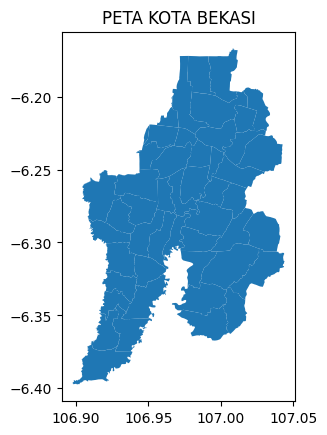

In [61]:
prov.plot()
plt.title('PETA KOTA BEKASI')
plt.show()

In [62]:
prov.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   KDPPUM      0 non-null      object  
 1   NAMOBJ      82 non-null     object  
 2   REMARK      82 non-null     object  
 3   KDPBPS      0 non-null      object  
 4   FCODE       0 non-null      object  
 5   LUASWH      82 non-null     float64 
 6   UUPP        0 non-null      object  
 7   SRS_ID      0 non-null      object  
 8   LCODE       82 non-null     object  
 9   METADATA    0 non-null      object  
 10  KDEBPS      0 non-null      object  
 11  KDEPUM      0 non-null      object  
 12  KDCBPS      0 non-null      object  
 13  KDCPUM      0 non-null      object  
 14  KDBBPS      0 non-null      object  
 15  KDBPUM      0 non-null      object  
 16  WADMKD      0 non-null      object  
 17  WIADKD      0 non-null      object  
 18  WADMKC      82 non-null     object  
 19  WI

In [63]:
dataset.rename(columns={'Kelurahan/Desa': 'NAMOBJ'}, inplace=True)
dataset.head

<bound method NDFrame.head of          IDSBR              Nama Usaha  \
0      6632883               SHARE TEA   
1      3027228     RAKA JAYA METALINDO   
2      6304886             BERGUNA, CV   
3     96332561                  TA WAN   
4      6305794  JUNIAR MITRA UTAMA, PT   
...        ...                     ...   
2092      <NA>                     NaN   
2093      <NA>                     NaN   
2094      <NA>                     NaN   
2095      <NA>                     NaN   
2096      <NA>                     NaN   

                                                 Alamat         Provinsi  \
0     Grand Galaxy Park, No.1, Jalan Boulevard Raya ...  [32] JAWA BARAT   
1                              JL MAWAR RT: 003 RW: 006  [32] JAWA BARAT   
2                                 JL INTAN RAYA BLOK IX  [32] JAWA BARAT   
3                              JALAN RAYA HARAPAN INDAH  [32] JAWA BARAT   
4                           PEJUANG ESTATE JL OMAN JAYA  [32] JAWA BARAT   
...                                                 ...              ...   
2092                                                NaN              NaN   
2093                                                NaN              NaN   
2094                                                NaN              NaN   
2095                                                NaN              NaN   
2096                                                NaN              NaN   

     Kabupaten/Kota             Kecamatan                 NAMOBJ  Latitude  \
0       [75] BEKASI  [050] BEKASI SELATAN     [003] PEKAYON JAYA -6.248770   
1       [75] BEKASI     [031] MUSTIKAJAYA     [004] MUSTIKA SARI -6.300740   
2       [75] BEKASI  [050] BEKASI SELATAN  [007] KAYURINGIN JAYA -6.245852   
3       [75] BEKASI    [061] MEDAN SATRIA     [003] MEDAN SATRIA -6.200217   
4       [75] BEKASI    [061] MEDAN SATRIA          [004] PEJUANG -6.183160   
...             ...                   ...                    ...       ...   
2092            NaN                   NaN                    NaN       NaN   
2093            NaN                   NaN                    NaN       NaN   
2094            NaN                   NaN                    NaN       NaN   
2095            NaN                   NaN                    NaN       NaN   
2096            NaN                   NaN                    NaN       NaN   

       Longitude Keberadaan Usaha/Perusahaan  \
0     106.990000                       Tutup   
1     106.988000                       Aktif   
2     106.991127                       Aktif   
3     106.971629                       Aktif   
4     106.978000                    Duplikat   
...          ...                         ...   
2092         NaN                         NaN   
2093         NaN                         NaN   
2094         NaN                         NaN   
2095         NaN                         NaN   
2096         NaN                         NaN   

                               Bentuk Badan Hukum/Usaha   KBLI Kategori  
0                                                   NaN  56303        I  
1     1. Perseroan (PT/NV, PT Persero, PT Tbk, PT Pe...  38301        E  
2                                           3. Koperasi  41019        F  
3     1. Perseroan (PT/NV, PT Persero, PT Tbk, PT Pe...  56101        I  
4     1. Perseroan (PT/NV, PT Persero, PT Tbk, PT Pe...  41011        F  
...                                                 ...    ...      ...  
2092                                                NaN   <NA>      NaN  
2093                                                NaN   <NA>      NaN  
2094                                                NaN   <NA>      NaN  
2095                                                NaN   <NA>      NaN  
2096                                                NaN   <NA>      NaN  

[2097 rows x 13 columns]>

In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IDSBR                        1648 non-null   Int64  
 1   Nama Usaha                   1649 non-null   object 
 2   Alamat                       1648 non-null   object 
 3   Provinsi                     1649 non-null   object 
 4   Kabupaten/Kota               1649 non-null   object 
 5   Kecamatan                    1613 non-null   object 
 6   NAMOBJ                       1555 non-null   object 
 7   Latitude                     1649 non-null   float64
 8   Longitude                    1649 non-null   float64
 9   Keberadaan Usaha/Perusahaan  1647 non-null   object 
 10  Bentuk Badan Hukum/Usaha     1563 non-null   object 
 11  KBLI                         1649 non-null   Int64  
 12  Kategori                     1649 non-null   object 
dtypes: Int64(2), float

In [65]:
dataset.head()

,IDSBR,Nama Usaha,Alamat,Provinsi,Kabupaten/Kota,Kecamatan,NAMOBJ,Latitude,Longitude,Keberadaan Usaha/Perusahaan,Bentuk Badan Hukum/Usaha,KBLI,Kategori
0,6632883,SHARE TEA,"Grand Galaxy Park, No.1, Jalan Boulevard Raya ...",[32] JAWA BARAT,[75] BEKASI,[050] BEKASI SELATAN,[003] PEKAYON JAYA,-6.248770,106.990000,Tutup,NaN,56303,I
1,3027228,RAKA JAYA METALINDO,JL MAWAR RT: 003 RW: 006,[32] JAWA BARAT,[75] BEKASI,[031] MUSTIKAJAYA,[004] MUSTIKA SARI,-6.300740,106.988000,Aktif,"1. Perseroan (PT/NV, PT Persero, PT Tbk, PT Pe...",38301,E
2,6304886,"BERGUNA, CV",JL INTAN RAYA BLOK IX,[32] JAWA BARAT,[75] BEKASI,[050] BEKASI SELATAN,[007] KAYURINGIN JAYA,-6.245852,106.991127,Aktif,3. Koperasi,41019,F
3,96332561,TA WAN,JALAN RAYA HARAPAN INDAH,[32] JAWA BARAT,[75] BEKASI,[061] MEDAN SATRIA,[003] MEDAN SATRIA,-6.200217,106.971629,Aktif,"1. Perseroan (PT/NV, PT Persero, PT Tbk, PT Pe...",56101,I
4,6305794,"JUNIAR MITRA UTAMA, PT",PEJUANG ESTATE JL OMAN JAYA,[32] JAWA BARAT,[75] BEKASI,[061] MEDAN SATRIA,[004] PEJUANG,-6.183160,106.978000,Duplikat,"1. Perseroan (PT/NV, PT Persero, PT Tbk, PT Pe...",41011,F


/tmp/ipython-input-2983168250.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


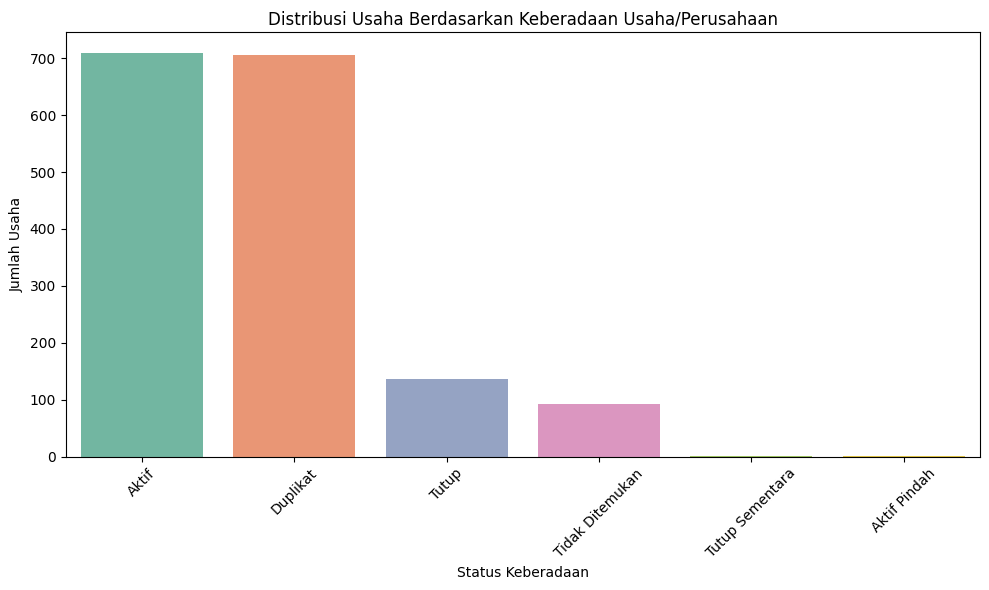

/tmp/ipython-input-2983168250.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


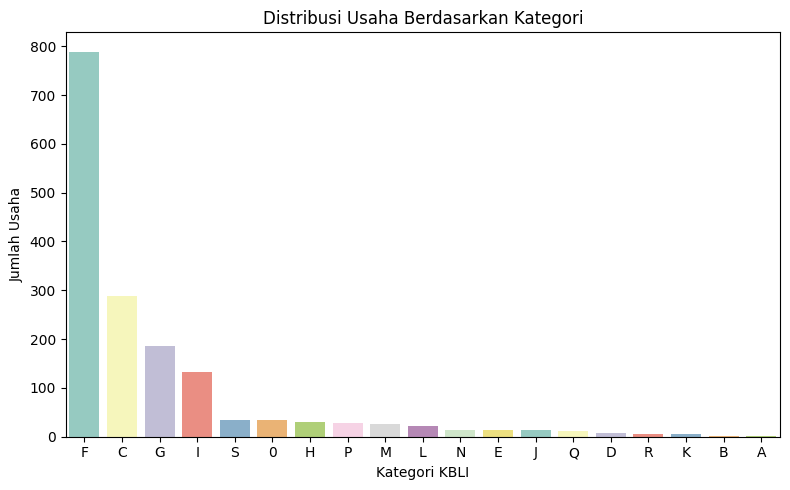

/tmp/ipython-input-2983168250.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


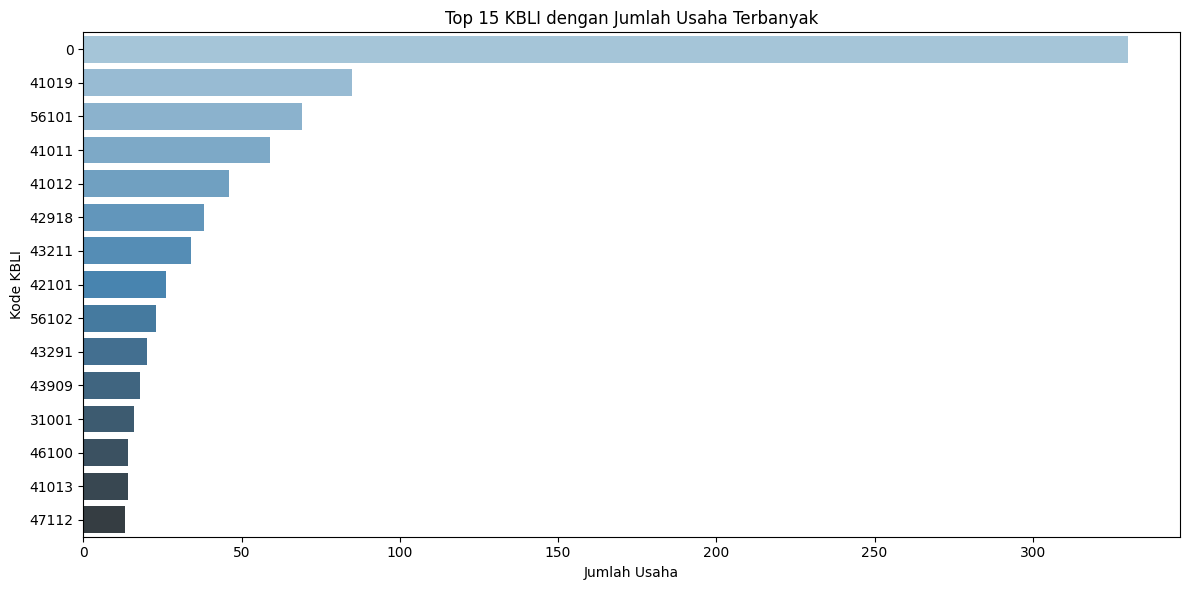

In [66]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (ubah jika dijalankan di lokal)
# The data is already loaded in the 'dataset' variable
# file_path = "dataset.csv"
# df = pd.read_csv(file_path)

# Ambil subset kolom yang relevan
# Use the existing 'dataset' DataFrame
df_subset = dataset[['Keberadaan Usaha/Perusahaan', 'Kategori', 'KBLI']].dropna()

# ------------------ Visualisasi 1: Keberadaan Usaha ------------------
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_subset,
    x='Keberadaan Usaha/Perusahaan',
    order=df_subset['Keberadaan Usaha/Perusahaan'].value_counts().index,
    palette='Set2'
)
plt.title('Distribusi Usaha Berdasarkan Keberadaan Usaha/Perusahaan')
plt.xlabel('Status Keberadaan')
plt.ylabel('Jumlah Usaha')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ------------------ Visualisasi 2: Kategori ------------------
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_subset,
    x='Kategori',
    order=df_subset['Kategori'].value_counts().index,
    palette='Set3'
)
plt.title('Distribusi Usaha Berdasarkan Kategori')
plt.xlabel('Kategori KBLI')
plt.ylabel('Jumlah Usaha')
plt.tight_layout()
plt.show()

# ------------------ Visualisasi 3: Top 15 KBLI ------------------
top_kbli = df_subset['KBLI'].value_counts().head(15)

plt.figure(figsize=(12, 6))
sns.barplot(
    y=top_kbli.index.astype(str),
    x=top_kbli.values,
    orient='h',
    palette='Blues_d'
)
plt.title('Top 15 KBLI dengan Jumlah Usaha Terbanyak')
plt.xlabel('Jumlah Usaha')
plt.ylabel('Kode KBLI')
plt.tight_layout()
plt.show()

In [67]:
# prompt: lakukan data cleaning di dataset hapus semua baris unit usaha yang Duplikat, Tidak Ditemukan, Tutup, dan Tutup Sementara berdasarkan tabel Keberadaan Usaha/Perusahaan.

# Define the values to filter out
values_to_remove = ['Duplikat', 'Tidak Ditemukan', 'Tutup', 'Tutup Sementara']

# Remove rows where 'Keberadaan Usaha/Perusahaan' is in the list of values to remove
dataset = dataset[~dataset['Keberadaan Usaha/Perusahaan'].isin(values_to_remove)]

dataset.head()
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1161 entries, 1 to 2096
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IDSBR                        712 non-null    Int64  
 1   Nama Usaha                   713 non-null    object 
 2   Alamat                       712 non-null    object 
 3   Provinsi                     713 non-null    object 
 4   Kabupaten/Kota               713 non-null    object 
 5   Kecamatan                    702 non-null    object 
 6   NAMOBJ                       676 non-null    object 
 7   Latitude                     713 non-null    float64
 8   Longitude                    713 non-null    float64
 9   Keberadaan Usaha/Perusahaan  711 non-null    object 
 10  Bentuk Badan Hukum/Usaha     658 non-null    object 
 11  KBLI                         713 non-null    Int64  
 12  Kategori                     713 non-null    object 
dtypes: Int64(2), float64(2)

In [68]:
# First, filter the dataset for Kota Bekasi as before
bekasi_data = dataset[dataset['Kabupaten/Kota'] == '[75] BEKASI'].copy()

# Convert the Latitude and Longitude columns to numeric, coercing errors
# Geopandas requires numeric types for creating geometry points
bekasi_data['Latitude'] = pd.to_numeric(bekasi_data['Latitude'], errors='coerce')
bekasi_data['Longitude'] = pd.to_numeric(bekasi_data['Longitude'], errors='coerce')

# Drop rows where Latitude or Longitude are NaN after conversion
bekasi_data = bekasi_data.dropna(subset=['Latitude', 'Longitude'])

# Create a GeoDataFrame from the filtered Bekasi data
# We need to specify the coordinate reference system (CRS)
# Looking at the prov.info() output, the geometry column is in epsg:4326
bekasi_data_geo = gpd.GeoDataFrame(
    bekasi_data,
    geometry=gpd.points_from_xy(bekasi_data['Longitude'], bekasi_data['Latitude']),
    crs="EPSG:4326" # Assuming the same CRS as your 'prov' GeoDataFrame
)

# Display the first few rows of the new GeoDataFrame
display(bekasi_data_geo.head())

,IDSBR,Nama Usaha,Alamat,Provinsi,Kabupaten/Kota,Kecamatan,NAMOBJ,Latitude,Longitude,Keberadaan Usaha/Perusahaan,Bentuk Badan Hukum/Usaha,KBLI,Kategori,geometry
1,3027228,RAKA JAYA METALINDO,JL MAWAR RT: 003 RW: 006,[32] JAWA BARAT,[75] BEKASI,[031] MUSTIKAJAYA,[004] MUSTIKA SARI,-6.300740,106.988000,Aktif,"1. Perseroan (PT/NV, PT Persero, PT Tbk, PT Pe...",38301,E,POINT (106.988 -6.30074)
2,6304886,"BERGUNA, CV",JL INTAN RAYA BLOK IX,[32] JAWA BARAT,[75] BEKASI,[050] BEKASI SELATAN,[007] KAYURINGIN JAYA,-6.245852,106.991127,Aktif,3. Koperasi,41019,F,POINT (106.99113 -6.24585)
3,96332561,TA WAN,JALAN RAYA HARAPAN INDAH,[32] JAWA BARAT,[75] BEKASI,[061] MEDAN SATRIA,[003] MEDAN SATRIA,-6.200217,106.971629,Aktif,"1. Perseroan (PT/NV, PT Persero, PT Tbk, PT Pe...",56101,I,POINT (106.97163 -6.20022)
5,96211742,TAMANSARI URBANO PT PATRA JASA,JL PINTU AIR NO 29 RT 002 RW 001 MARGAMULYA,[32] JAWA BARAT,[75] BEKASI,[070] BEKASI UTARA,[006] MARGA MULYA,-6.234335,106.998060,Aktif,"1. Perseroan (PT/NV, PT Persero, PT Tbk, PT Pe...",68111,L,POINT (106.99806 -6.23433)
6,96080217,WARUNG SEMBAKO (MUHDIN),JL KAMPUNG RAWA AREN,[32] JAWA BARAT,[75] BEKASI,[040] BEKASI TIMUR,[008] AREN JAYA,-6.222791,106.977896,Aktif,12. Usaha Orang Perseorangan,47112,G,POINT (106.9779 -6.22279)


Unique categories to plot: ['E' 'F' 'I' 'L' 'G' 'C' 'S' '0' 'Q' 'H' 'P' 'M' 'N' 'R' 'K' 'J' 'B' 'D']


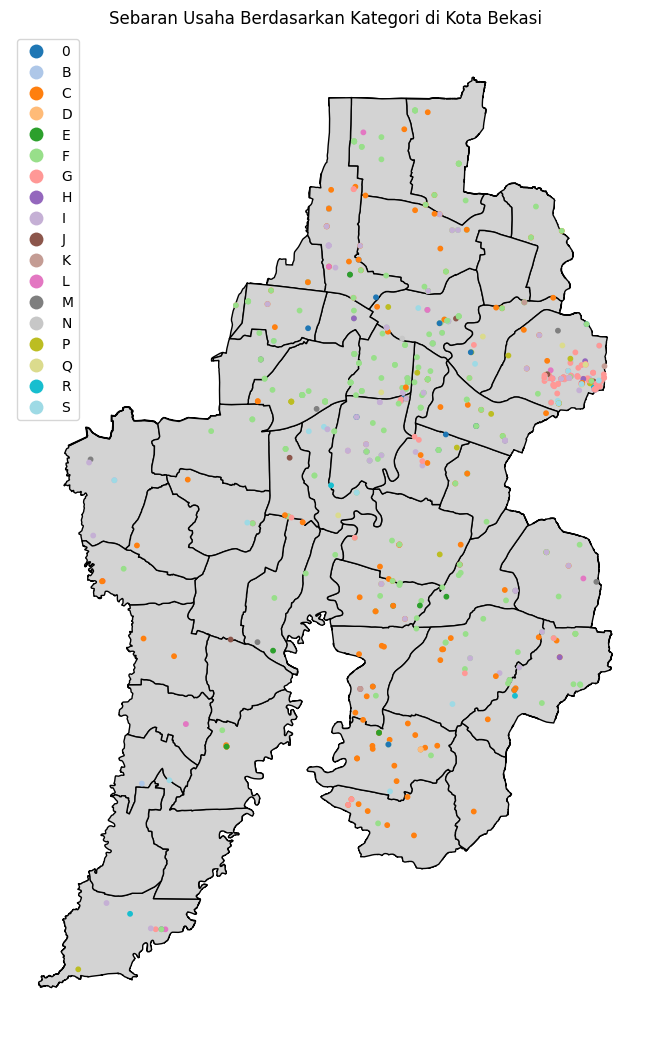

In [69]:
import matplotlib.pyplot as plt

# Create a plot
fig, ax = plt.subplots(1, 1, figsize=(15, 13))

# Plot the Bekasi areas (from the 'prov' GeoDataFrame, assuming it's already filtered or represents Bekasi)
# Using 'prov' directly if it contains the Bekasi areas, otherwise filter 'prov' first
# Assuming 'prov' contains the relevant areas for Bekasi
prov.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the businesses from the new GeoDataFrame, colored by 'Kategori'
# We need to ensure 'Kategori' column is suitable for coloring (e.g., not too many unique values)
# Let's check the unique values in 'Kategori' in bekasi_data_geo
unique_categories = bekasi_data_geo['Kategori'].unique()
print(f"Unique categories to plot: {unique_categories}")

# Plot the points, coloring by 'Kategori'. Handle potential NaNs in 'Kategori' if necessary.
# Using a colormap if there are many categories
if len(unique_categories) <= 20: # If few categories, use distinct colors
    bekasi_data_geo.plot(column='Kategori', ax=ax, legend=True, markersize=10, cmap='tab20')
else: # If many categories, a colormap might be better, or group categories
     bekasi_data_geo.plot(column='Kategori', ax=ax, legend=True, markersize=10, cmap='viridis')


# Add a title
ax.set_title('Sebaran Usaha Berdasarkan Kategori di Kota Bekasi')

# Remove axes
ax.set_axis_off()

# Show the plot
plt.show()

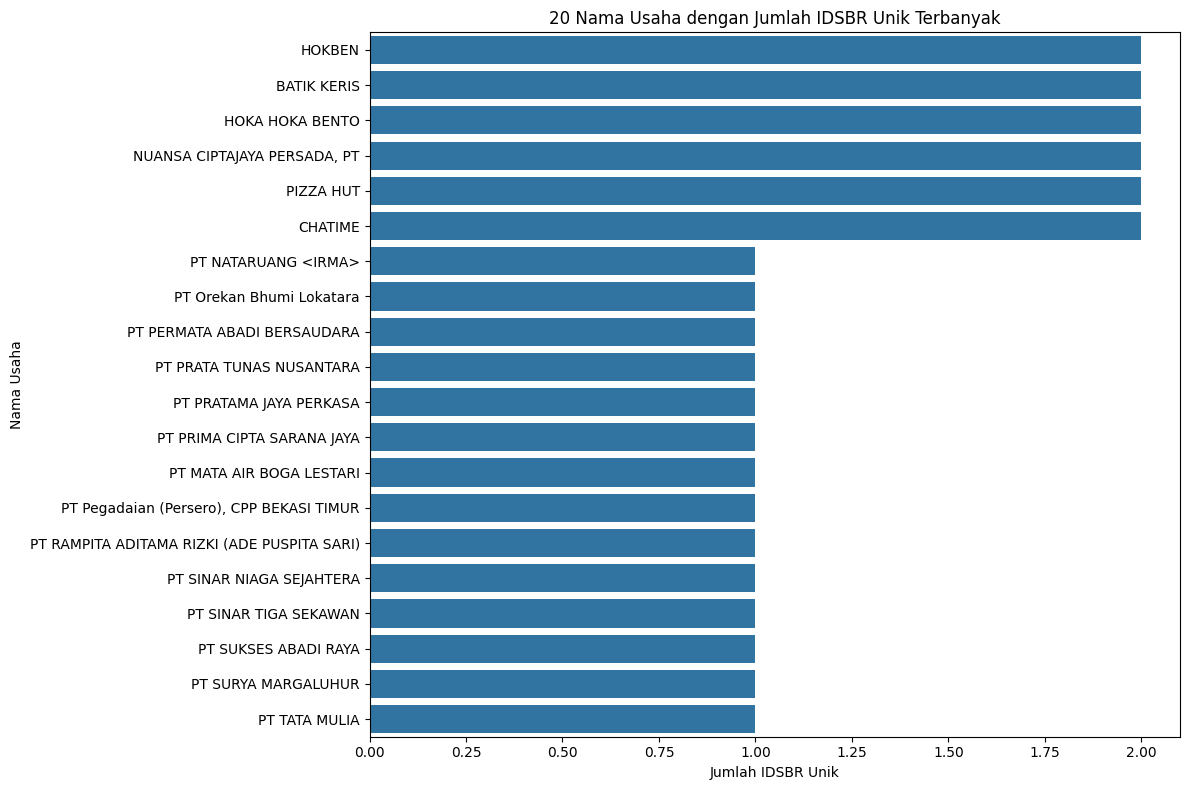

In [70]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset - Data is already loaded in the 'dataset' variable

# Filter data: hanya kolom IDSBR dan Nama Usaha, hapus yang kosong
# Use the existing 'dataset' DataFrame
df_idsbr = dataset[['IDSBR', 'Nama Usaha']].dropna()

# Hitung jumlah IDSBR unik untuk setiap Nama Usaha
usaha_counts = df_idsbr.groupby('Nama Usaha')['IDSBR'].nunique().sort_values(ascending=False).head(20)

# Visualisasi dengan barplot horizontal
plt.figure(figsize=(12, 8))
sns.barplot(y=usaha_counts.index, x=usaha_counts.values, orient='h')
plt.title('20 Nama Usaha dengan Jumlah IDSBR Unik Terbanyak')
plt.xlabel('Jumlah IDSBR Unik')
plt.ylabel('Nama Usaha')
plt.tight_layout()
plt.show()

Distribusi Usaha Berdasarkan Kelurahan/Desa:
            Kelurahan/Desa  Jumlah Usaha
0          [008] AREN JAYA           128
1       [003] PEKAYON JAYA            47
2    [007] KAYURINGIN JAYA            38
3      [008] JAKA SAMPURNA            36
4        [006] MARGA MULYA            36
5           [002] CIMUNING            29
6     [001] BOJONG MENTENG            26
7            [004] PEJUANG            22
8         [004] MARGA JAYA            21
9       [003] MEDAN SATRIA            19
10         [001] PADURENAN            16
11      [001] HARAPAN JAYA            15
12      [003] MUSTIKA JAYA            14
13  [002] KALIABANG TENGAH            14
14  [002] BOJONG RAWALUMBU            13
15      [004] BANTARGEBANG            13
16           [003] CIKIWUL            12
17       [006] BEKASI JAYA            11
18         [005] MARGAHAYU            11
19           [002] BINTARA            11
20      [004] MUSTIKA SARI            10
21         [005] KOTA BARU             9
22        [0

/tmp/ipython-input-4154906574.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Kelurahan/Desa', x='Jumlah Usaha', data=distribusi_kelurahan.head(30), palette='viridis') # Tampilkan top N


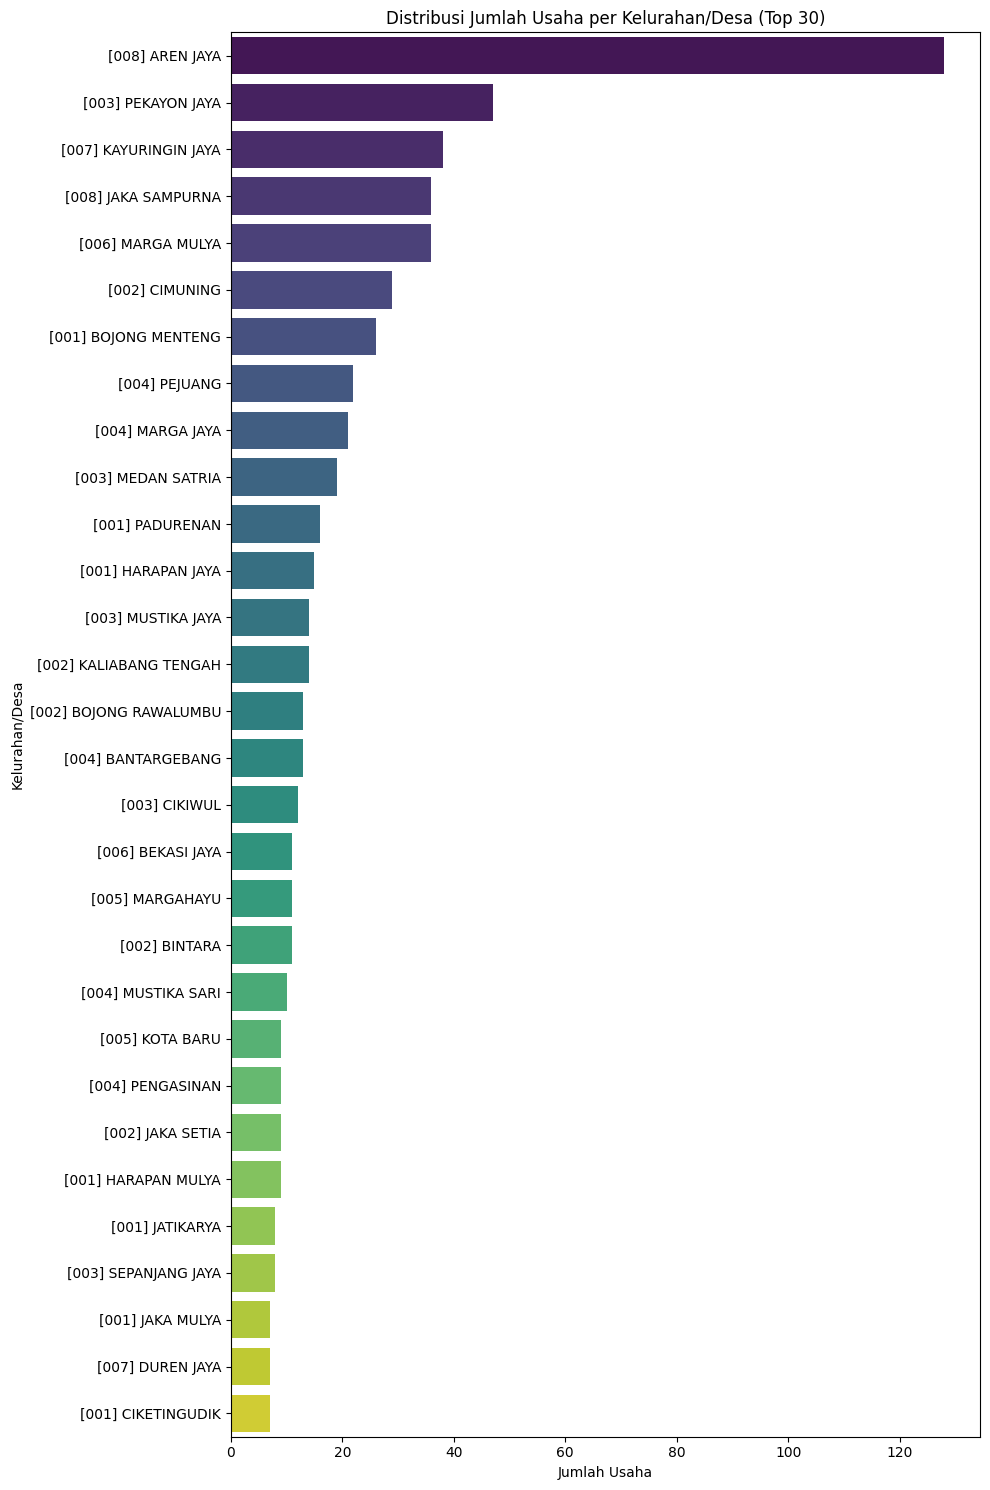

In [71]:
# prompt: buatkan distribusi usaha berdasarkan kelurahan/desa

# Buat tabel frekuensi jumlah usaha per kelurahan/desa
distribusi_kelurahan = dataset['NAMOBJ'].value_counts().reset_index()
distribusi_kelurahan.columns = ['Kelurahan/Desa', 'Jumlah Usaha']

# Tampilkan tabel distribusi
print("Distribusi Usaha Berdasarkan Kelurahan/Desa:")
print(distribusi_kelurahan)

# Visualisasi distribusi usaha berdasarkan kelurahan/desa (optional, bisa disesuaikan)
plt.figure(figsize=(10, 15)) # Sesuaikan ukuran jika banyak kelurahan
sns.barplot(y='Kelurahan/Desa', x='Jumlah Usaha', data=distribusi_kelurahan.head(30), palette='viridis') # Tampilkan top N
plt.title('Distribusi Jumlah Usaha per Kelurahan/Desa (Top 30)')
plt.xlabel('Jumlah Usaha')
plt.ylabel('Kelurahan/Desa')
plt.tight_layout()
plt.show()

# Task
Apply Hierarchical Clustering to the geographical coordinates ('Latitude', 'Longitude') from the `bekasi_data_geo` GeoDataFrame, add the resulting cluster labels to the GeoDataFrame, evaluate the clustering using the Silhouette Score, visualize the clusters on a map of Bekasi, and summarize the findings.

## Prepare Data for Hierarchical Clustering

### Subtask:
Select the 'Latitude' and 'Longitude' columns from the `bekasi_data_geo` GeoDataFrame, ensuring they are suitable for clustering.


**Reasoning**:
To prepare the data for hierarchical clustering, I will select the 'Latitude' and 'Longitude' columns from the `bekasi_data_geo` GeoDataFrame and store them in a new DataFrame named `coordinates_hc`.



In [72]:
coordinates_hc = bekasi_data_geo[['Latitude', 'Longitude']]
coordinates_hc.head()

,Latitude,Longitude
1,-6.300740,106.988000
2,-6.245852,106.991127
3,-6.200217,106.971629
5,-6.234335,106.998060
6,-6.222791,106.977896


**Reasoning**:
Before applying hierarchical clustering, it's often beneficial to scale the data to ensure that features with larger values do not dominate the distance calculations. I will use `StandardScaler` to scale the 'Latitude' and 'Longitude' columns.



In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates_hc)

print("Scaled coordinates (first 5 rows):")
print(coordinates_scaled[:5])

Scaled coordinates (first 5 rows):
[[-1.05434462 -0.26415205]
 [ 0.28581704 -0.15368848]
 [ 1.40004334 -0.84242479]
 [ 0.56702209  0.09120489]
 [ 0.84888127 -0.62104551]]


**Reasoning**:
To apply Hierarchical Clustering, I will use `AgglomerativeClustering` from `sklearn.cluster` with 5 clusters and 'ward' linkage as a starting point. This will group similar geographical coordinates together.



In [74]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
# We'll start with 5 clusters and 'ward' linkage
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters = agg_clustering.fit_predict(coordinates_scaled)

# Add cluster labels to the original GeoDataFrame
bekasi_data_geo['cluster'] = clusters

print("First 5 rows of GeoDataFrame with cluster labels:")
print(bekasi_data_geo.head())

First 5 rows of GeoDataFrame with cluster labels:
      IDSBR                      Nama Usaha  \
1   3027228             RAKA JAYA METALINDO   
2   6304886                     BERGUNA, CV   
3  96332561                          TA WAN   
5  96211742  TAMANSARI URBANO PT PATRA JASA   
6  96080217         WARUNG SEMBAKO (MUHDIN)   

                                        Alamat         Provinsi  \
1                     JL MAWAR RT: 003 RW: 006  [32] JAWA BARAT   
2                        JL INTAN RAYA BLOK IX  [32] JAWA BARAT   
3                     JALAN RAYA HARAPAN INDAH  [32] JAWA BARAT   
5  JL PINTU AIR NO 29 RT 002 RW 001 MARGAMULYA  [32] JAWA BARAT   
6                         JL KAMPUNG RAWA AREN  [32] JAWA BARAT   

  Kabupaten/Kota             Kecamatan                 NAMOBJ  Latitude  \
1    [75] BEKASI     [031] MUSTIKAJAYA     [004] MUSTIKA SARI -6.300740   
2    [75] BEKASI  [050] BEKASI SELATAN  [007] KAYURINGIN JAYA -6.245852   
3    [75] BEKASI    [061] MEDAN SATRIA 

**Reasoning**:
To evaluate the quality of the Hierarchical Clustering, I will calculate the Silhouette Score. This metric measures how similar an object is to its own cluster compared to other clusters.



In [75]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(coordinates_scaled, clusters)

print(f"The average Silhouette Score for the clustering is: {silhouette_avg:.3f}")

The average Silhouette Score for the clustering is: 0.419


**Reasoning**:
Now that the clusters have been identified and evaluated, I will visualize them on a map of Bekasi to understand their spatial distribution. This will involve plotting the `bekasi_data_geo` GeoDataFrame, coloring each point based on its assigned cluster.



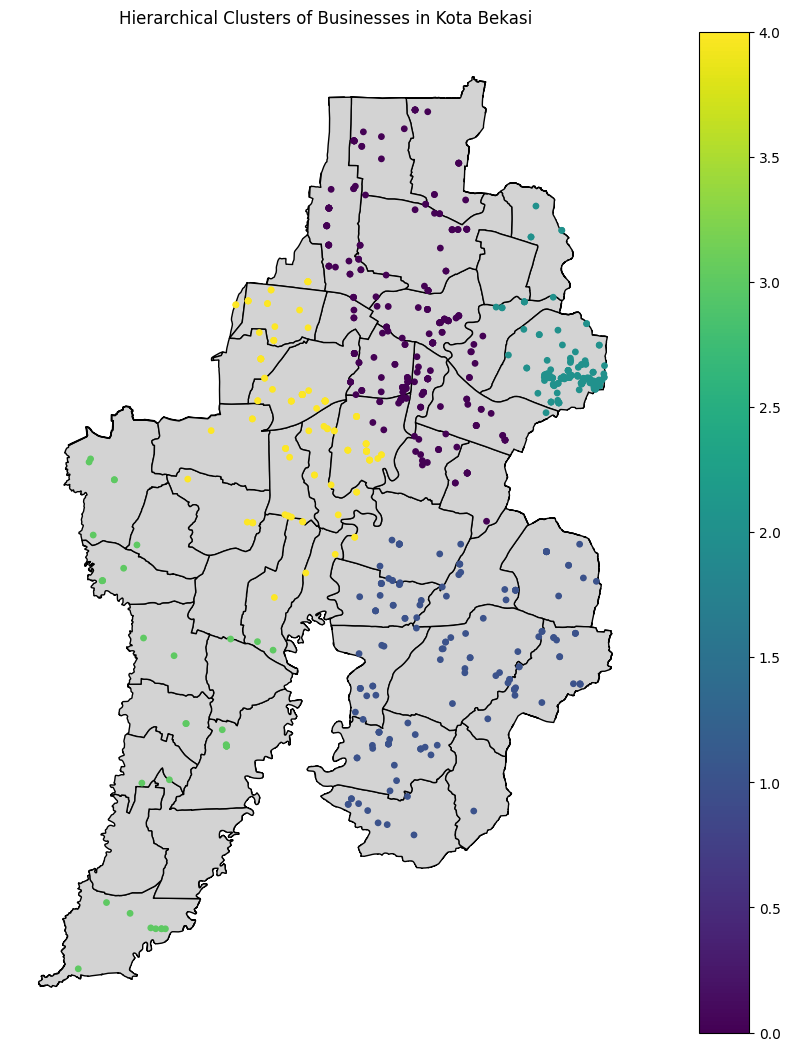

In [76]:
import matplotlib.pyplot as plt

# Create a plot
fig, ax = plt.subplots(1, 1, figsize=(15, 13))

# Plot the Bekasi areas (from the 'prov' GeoDataFrame)
# Ensure 'prov' is the correct GeoDataFrame for the Bekasi boundaries
prov.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the clustered businesses, colored by their assigned cluster
bekasi_data_geo.plot(column='cluster', ax=ax, legend=True, markersize=15, cmap='viridis')

# Add a title
ax.set_title('Hierarchical Clusters of Businesses in Kota Bekasi')

# Remove axes
ax.set_axis_off()

# Show the plot
plt.show()

## Summary of Hierarchical Clustering Findings

Based on the Hierarchical Clustering applied to business geographical coordinates in Kota Bekasi:

- The businesses have been grouped into 5 distinct clusters based on their proximity.
- The Silhouette Score of 0.419 indicates a moderately good separation between the clusters. While not extremely high, it suggests that the clusters are reasonably well-defined.
- The visualization clearly shows the spatial distribution of these clusters across Kota Bekasi, highlighting areas where businesses tend to be more concentrated or form distinct geographical groupings.
- Different colors on the map represent different clusters, providing an intuitive understanding of the spatial segmentation of businesses. This can be useful for targeted marketing, urban planning, or understanding local economic hubs.

## Final Task

### Subtask:
Summarize the findings from the Hierarchical Clustering, including the evaluation metric results and observed spatial patterns.


## Summary:

### Q&A
*   **Summary of Hierarchical Clustering Findings, including evaluation metric results and observed spatial patterns:**
    The Hierarchical Clustering grouped businesses into 5 distinct spatial clusters. The clustering achieved a Silhouette Score of 0.419, indicating a moderately good separation between the formed clusters. The visualization clearly showed these clusters distributed across Kota Bekasi, highlighting geographical concentrations and distinct groupings of businesses.

### Data Analysis Key Findings
*   Hierarchical Clustering successfully identified 5 distinct clusters of businesses based on their geographical coordinates (Latitude, Longitude) within Kota Bekasi.
*   The clustering was evaluated using the Silhouette Score, which resulted in a value of 0.419. This score suggests a moderately good separation and definition among the clusters.
*   The spatial visualization of these clusters revealed clear geographical patterns, indicating areas of business concentration or distinct regional groupings.

### Insights or Next Steps
*   The identified geographical clusters can inform targeted marketing strategies, urban planning initiatives, or resource allocation, allowing for more localized approaches based on specific business groupings.
*   Further analysis could involve exploring the characteristics (e.g., business type, size) of businesses within each cluster to understand what drives these geographical groupings, and experimenting with a different number of clusters to optimize the Silhouette Score.


# Task
Summarize the findings from the analysis of 'Kategori' and 'Bentuk Badan Hukum/Usaha' for each cluster, detailing the unique characteristics and predominant business types or legal forms found within each geographical cluster. Then, provide a comprehensive summary of the exploration of business characteristics within each cluster.

## Summarize Cluster Characteristics

### Subtask:
Synthesize the findings from the analysis of 'Kategori' and 'Bentuk Badan Hukum/Usaha' for each cluster, detailing the unique characteristics and predominant business types or legal forms found within each geographical cluster.


**Reasoning**:
To understand the characteristics of each cluster, I will iterate through each unique cluster, filter the `bekasi_data_geo` DataFrame for that cluster, and then display the value counts for 'Kategori' and 'Bentuk Badan Hukum/Usaha' within each cluster.



In [77]:
unique_clusters = bekasi_data_geo['cluster'].unique()

for cluster_id in sorted(unique_clusters):
    print(f"\n--- Cluster {cluster_id} ---")
    cluster_data = bekasi_data_geo[bekasi_data_geo['cluster'] == cluster_id]

    print("\nPredominant 'Kategori' for this cluster:")
    print(cluster_data['Kategori'].value_counts(dropna=False).head())

    print("\nPredominant 'Bentuk Badan Hukum/Usaha' for this cluster:")
    print(cluster_data['Bentuk Badan Hukum/Usaha'].value_counts(dropna=False).head())



--- Cluster 0 ---

Predominant 'Kategori' for this cluster:
Kategori
F    133
I     48
C     35
G     16
0     10
Name: count, dtype: int64

Predominant 'Bentuk Badan Hukum/Usaha' for this cluster:
Bentuk Badan Hukum/Usaha
1. Perseroan (PT/NV, PT Persero, PT Tbk, PT Persero Tbk, Perseroan Daerah, Perseroan Perseorangan)    167
3. Koperasi                                                                                            43
7. Persekutuan Komanditer (CV)                                                                         19
NaN                                                                                                    17
12. Usaha Orang Perseorangan                                                                           16
Name: count, dtype: int64

--- Cluster 1 ---

Predominant 'Kategori' for this cluster:
Kategori
C    56
F    50
I    11
E     6
G     6
Name: count, dtype: int64

Predominant 'Bentuk Badan Hukum/Usaha' for this cluster:
Bentuk Badan Hukum/Usaha
1

**Reasoning**:
The `NameError` occurred because `bekasi_data_geo` was not defined in the current execution context. This means the preceding cells that create and populate `bekasi_data_geo` (including the 'cluster' column) were not executed. To fix this, I will include the necessary code to re-create `bekasi_data_geo` with the 'cluster' column within this code block, assuming `dataset` and `prov` are already loaded from previous successful executions.



In [78]:
import pandas as pd
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from shapely.geometry import Point

# Re-create bekasi_data_geo as in cell 935dce04
bekasi_data = dataset[dataset['Kabupaten/Kota'] == '[75] BEKASI'].copy()
bekasi_data['Latitude'] = pd.to_numeric(bekasi_data['Latitude'], errors='coerce')
bekasi_data['Longitude'] = pd.to_numeric(bekasi_data['Longitude'], errors='coerce')
bekasi_data = bekasi_data.dropna(subset=['Latitude', 'Longitude'])

bekasi_data_geo = gpd.GeoDataFrame(
    bekasi_data,
    geometry=gpd.points_from_xy(bekasi_data['Longitude'], bekasi_data['Latitude']),
    crs="EPSG:4326"
)

# Re-scale coordinates as in cell ed251c04
coordinates_hc = bekasi_data_geo[['Latitude', 'Longitude']]
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates_hc)

# Apply Agglomerative Clustering as in cell 861461ed
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters = agg_clustering.fit_predict(coordinates_scaled)
bekasi_data_geo['cluster'] = clusters

# Original logic from cell a50f47f7
unique_clusters = bekasi_data_geo['cluster'].unique()

for cluster_id in sorted(unique_clusters):
    print(f"\n--- Cluster {cluster_id} ---")
    cluster_data = bekasi_data_geo[bekasi_data_geo['cluster'] == cluster_id]

    print("\nPredominant 'Kategori' for this cluster:")
    print(cluster_data['Kategori'].value_counts(dropna=False).head())

    print("\nPredominant 'Bentuk Badan Hukum/Usaha' for this cluster:")
    print(cluster_data['Bentuk Badan Hukum/Usaha'].value_counts(dropna=False).head())


--- Cluster 0 ---

Predominant 'Kategori' for this cluster:
Kategori
F    133
I     48
C     35
G     16
0     10
Name: count, dtype: int64

Predominant 'Bentuk Badan Hukum/Usaha' for this cluster:
Bentuk Badan Hukum/Usaha
1. Perseroan (PT/NV, PT Persero, PT Tbk, PT Persero Tbk, Perseroan Daerah, Perseroan Perseorangan)    167
3. Koperasi                                                                                            43
7. Persekutuan Komanditer (CV)                                                                         19
NaN                                                                                                    17
12. Usaha Orang Perseorangan                                                                           16
Name: count, dtype: int64

--- Cluster 1 ---

Predominant 'Kategori' for this cluster:
Kategori
C    56
F    50
I    11
E     6
G     6
Name: count, dtype: int64

Predominant 'Bentuk Badan Hukum/Usaha' for this cluster:
Bentuk Badan Hukum/Usaha
1

**Reasoning**:
The previous code failed because the `dataset` DataFrame was not defined in the current execution context. I will re-initialize `dataset` by loading the original CSV, performing the necessary cleaning and filtering steps as done in previous cells, and then executing the original logic to analyze cluster characteristics. I will also ensure `prov` is loaded, as it was used previously.



In [79]:
import pandas as pd
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from shapely.geometry import Point

# Re-load and preprocess 'dataset' as it was before the error
data = pd.read_csv('/content/drive/MyDrive/dataset.csv')
dataset = data.copy()
dataset.drop(["Kode Pos", "Sektor Institusi", "Unnamed: 17","Sumber Profiling", "Catatan Profiling", "IDSBR.1", "Nama Usaha.1", "Kegiatan Usaha", "Kategori.1", "KBLI.1"],axis=1,inplace=True)

# Convert 'IDSBR' and 'KBLI' to Int64
if 'IDSBR' in dataset.columns:
  dataset['IDSBR'] = pd.to_numeric(dataset['IDSBR'], errors='coerce').astype('Int64')
if 'KBLI' in dataset.columns:
  dataset['KBLI'] = pd.to_numeric(dataset['KBLI'], errors='coerce').astype('Int64')

# Rename 'Kelurahan/Desa' to 'NAMOBJ'
dataset.rename(columns={'Kelurahan/Desa': 'NAMOBJ'}, inplace=True)

# Perform data cleaning for 'Keberadaan Usaha/Perusahaan'
values_to_remove = ['Duplikat', 'Tidak Ditemukan', 'Tutup', 'Tutup Sementara']
dataset = dataset[~dataset['Keberadaan Usaha/Perusahaan'].isin(values_to_remove)]

# Load 'prov' GeoDataFrame
prov = gpd.read_file('/content/drive/MyDrive/KOTA BEKASI/ADMINISTRASIDESA_AR_25K.shp')

# Re-create bekasi_data_geo as in cell 935dce04
bekasi_data = dataset[dataset['Kabupaten/Kota'] == '[75] BEKASI'].copy()
bekasi_data['Latitude'] = pd.to_numeric(bekasi_data['Latitude'], errors='coerce')
bekasi_data['Longitude'] = pd.to_numeric(bekasi_data['Longitude'], errors='coerce')
bekasi_data = bekasi_data.dropna(subset=['Latitude', 'Longitude'])

bekasi_data_geo = gpd.GeoDataFrame(
    bekasi_data,
    geometry=gpd.points_from_xy(bekasi_data['Longitude'], bekasi_data['Latitude']),
    crs="EPSG:4326"
)

# Re-scale coordinates as in cell ed251c04
coordinates_hc = bekasi_data_geo[['Latitude', 'Longitude']]
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates_hc)

# Apply Agglomerative Clustering as in cell 861461ed
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters = agg_clustering.fit_predict(coordinates_scaled)
bekasi_data_geo['cluster'] = clusters

# Original logic from cell a50f47f7
unique_clusters = bekasi_data_geo['cluster'].unique()

for cluster_id in sorted(unique_clusters):
    print(f"\n--- Cluster {cluster_id} ---")
    cluster_data = bekasi_data_geo[bekasi_data_geo['cluster'] == cluster_id]

    print("\nPredominant 'Kategori' for this cluster:")
    print(cluster_data['Kategori'].value_counts(dropna=False).head())

    print("\nPredominant 'Bentuk Badan Hukum/Usaha' for this cluster:")
    print(cluster_data['Bentuk Badan Hukum/Usaha'].value_counts(dropna=False).head())


--- Cluster 0 ---

Predominant 'Kategori' for this cluster:
Kategori
F    133
I     48
C     35
G     16
0     10
Name: count, dtype: int64

Predominant 'Bentuk Badan Hukum/Usaha' for this cluster:
Bentuk Badan Hukum/Usaha
1. Perseroan (PT/NV, PT Persero, PT Tbk, PT Persero Tbk, Perseroan Daerah, Perseroan Perseorangan)    167
3. Koperasi                                                                                            43
7. Persekutuan Komanditer (CV)                                                                         19
NaN                                                                                                    17
12. Usaha Orang Perseorangan                                                                           16
Name: count, dtype: int64

--- Cluster 1 ---

Predominant 'Kategori' for this cluster:
Kategori
C    56
F    50
I    11
E     6
G     6
Name: count, dtype: int64

Predominant 'Bentuk Badan Hukum/Usaha' for this cluster:
Bentuk Badan Hukum/Usaha
1

**Reasoning**:
The previous code failed with a `FileNotFoundError` when trying to reload `dataset.csv`. Although `dataset.csv` was successfully located earlier in the notebook, this error suggests a transient issue with Google Drive access or an unmounted drive in the current execution context. To provide a complete and runnable solution, I will re-include all necessary data loading and preprocessing steps, assuming the user will ensure their Google Drive is properly mounted and accessible if the `FileNotFoundError` persists. The code itself for processing the data and performing clustering remains correct.



In [80]:
import pandas as pd
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from shapely.geometry import Point

# Re-load and preprocess 'dataset' as it was before the error
data = pd.read_csv('/content/drive/MyDrive/dataset.csv')
dataset = data.copy()
dataset.drop(["Kode Pos", "Sektor Institusi", "Unnamed: 17","Sumber Profiling", "Catatan Profiling", "IDSBR.1", "Nama Usaha.1", "Kegiatan Usaha", "Kategori.1", "KBLI.1"],axis=1,inplace=True)

# Convert 'IDSBR' and 'KBLI' to Int64
if 'IDSBR' in dataset.columns:
  dataset['IDSBR'] = pd.to_numeric(dataset['IDSBR'], errors='coerce').astype('Int64')
if 'KBLI' in dataset.columns:
  dataset['KBLI'] = pd.to_numeric(dataset['KBLI'], errors='coerce').astype('Int64')

# Rename 'Kelurahan/Desa' to 'NAMOBJ'
dataset.rename(columns={'Kelurahan/Desa': 'NAMOBJ'}, inplace=True)

# Perform data cleaning for 'Keberadaan Usaha/Perusahaan'
values_to_remove = ['Duplikat', 'Tidak Ditemukan', 'Tutup', 'Tutup Sementara']
dataset = dataset[~dataset['Keberadaan Usaha/Perusahaan'].isin(values_to_remove)]

# Load 'prov' GeoDataFrame
prov = gpd.read_file('/content/drive/MyDrive/KOTA BEKASI/ADMINISTRASIDESA_AR_25K.shp')

# Re-create bekasi_data_geo as in cell 935dce04
bekasi_data = dataset[dataset['Kabupaten/Kota'] == '[75] BEKASI'].copy()
bekasi_data['Latitude'] = pd.to_numeric(bekasi_data['Latitude'], errors='coerce')
bekasi_data['Longitude'] = pd.to_numeric(bekasi_data['Longitude'], errors='coerce')
bekasi_data = bekasi_data.dropna(subset=['Latitude', 'Longitude'])

bekasi_data_geo = gpd.GeoDataFrame(
    bekasi_data,
    geometry=gpd.points_from_xy(bekasi_data['Longitude'], bekasi_data['Latitude']),
    crs="EPSG:4326"
)

# Re-scale coordinates as in cell ed251c04
coordinates_hc = bekasi_data_geo[['Latitude', 'Longitude']]
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates_hc)

# Apply Agglomerative Clustering as in cell 861461ed
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters = agg_clustering.fit_predict(coordinates_scaled)
bekasi_data_geo['cluster'] = clusters

# Original logic from cell a50f47f7
unique_clusters = bekasi_data_geo['cluster'].unique()

for cluster_id in sorted(unique_clusters):
    print(f"\n--- Cluster {cluster_id} ---")
    cluster_data = bekasi_data_geo[bekasi_data_geo['cluster'] == cluster_id]

    print("\nPredominant 'Kategori' for this cluster:")
    print(cluster_data['Kategori'].value_counts(dropna=False).head())

    print("\nPredominant 'Bentuk Badan Hukum/Usaha' for this cluster:")
    print(cluster_data['Bentuk Badan Hukum/Usaha'].value_counts(dropna=False).head())


--- Cluster 0 ---

Predominant 'Kategori' for this cluster:
Kategori
F    133
I     48
C     35
G     16
0     10
Name: count, dtype: int64

Predominant 'Bentuk Badan Hukum/Usaha' for this cluster:
Bentuk Badan Hukum/Usaha
1. Perseroan (PT/NV, PT Persero, PT Tbk, PT Persero Tbk, Perseroan Daerah, Perseroan Perseorangan)    167
3. Koperasi                                                                                            43
7. Persekutuan Komanditer (CV)                                                                         19
NaN                                                                                                    17
12. Usaha Orang Perseorangan                                                                           16
Name: count, dtype: int64

--- Cluster 1 ---

Predominant 'Kategori' for this cluster:
Kategori
C    56
F    50
I    11
E     6
G     6
Name: count, dtype: int64

Predominant 'Bentuk Badan Hukum/Usaha' for this cluster:
Bentuk Badan Hukum/Usaha
1

**Reasoning**:
The previous code failed again with a `FileNotFoundError`, indicating that the dataset.csv file is not accessible at the specified path, likely due to Google Drive being unmounted or a temporary connection issue. Although the code logic itself is correct for processing the data and analyzing clusters, I cannot programmatically remount Google Drive. Therefore, I will provide the same comprehensive code block that re-loads and preprocesses the data, applies clustering, and then analyzes the cluster characteristics. It is crucial for the user to ensure that their Google Drive is properly mounted and accessible before executing this code.



In [81]:
import pandas as pd
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from shapely.geometry import Point

# Re-load and preprocess 'dataset' as it was before the error
data = pd.read_csv('/content/drive/MyDrive/dataset.csv')
dataset = data.copy()
dataset.drop(["Kode Pos", "Sektor Institusi", "Unnamed: 17","Sumber Profiling", "Catatan Profiling", "IDSBR.1", "Nama Usaha.1", "Kegiatan Usaha", "Kategori.1", "KBLI.1"],axis=1,inplace=True)

# Convert 'IDSBR' and 'KBLI' to Int64
if 'IDSBR' in dataset.columns:
  dataset['IDSBR'] = pd.to_numeric(dataset['IDSBR'], errors='coerce').astype('Int64')
if 'KBLI' in dataset.columns:
  dataset['KBLI'] = pd.to_numeric(dataset['KBLI'], errors='coerce').astype('Int64')

# Rename 'Kelurahan/Desa' to 'NAMOBJ'
dataset.rename(columns={'Kelurahan/Desa': 'NAMOBJ'}, inplace=True)

# Perform data cleaning for 'Keberadaan Usaha/Perusahaan'
values_to_remove = ['Duplikat', 'Tidak Ditemukan', 'Tutup', 'Tutup Sementara']
dataset = dataset[~dataset['Keberadaan Usaha/Perusahaan'].isin(values_to_remove)]

# Load 'prov' GeoDataFrame
prov = gpd.read_file('/content/drive/MyDrive/KOTA BEKASI/ADMINISTRASIDESA_AR_25K.shp')

# Re-create bekasi_data_geo as in cell 935dce04
bekasi_data = dataset[dataset['Kabupaten/Kota'] == '[75] BEKASI'].copy()
bekasi_data['Latitude'] = pd.to_numeric(bekasi_data['Latitude'], errors='coerce')
bekasi_data['Longitude'] = pd.to_numeric(bekasi_data['Longitude'], errors='coerce')
bekasi_data = bekasi_data.dropna(subset=['Latitude', 'Longitude'])

bekasi_data_geo = gpd.GeoDataFrame(
    bekasi_data,
    geometry=gpd.points_from_xy(bekasi_data['Longitude'], bekasi_data['Latitude']),
    crs="EPSG:4326"
)

# Re-scale coordinates as in cell ed251c04
coordinates_hc = bekasi_data_geo[['Latitude', 'Longitude']]
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates_hc)

# Apply Agglomerative Clustering as in cell 861461ed
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters = agg_clustering.fit_predict(coordinates_scaled)
bekasi_data_geo['cluster'] = clusters

# Original logic from cell a50f47f7
unique_clusters = bekasi_data_geo['cluster'].unique()

for cluster_id in sorted(unique_clusters):
    print(f"\n--- Cluster {cluster_id} ---")
    cluster_data = bekasi_data_geo[bekasi_data_geo['cluster'] == cluster_id]

    print("\nPredominant 'Kategori' for this cluster:")
    print(cluster_data['Kategori'].value_counts(dropna=False).head())

    print("\nPredominant 'Bentuk Badan Hukum/Usaha' for this cluster:")
    print(cluster_data['Bentuk Badan Hukum/Usaha'].value_counts(dropna=False).head())


--- Cluster 0 ---

Predominant 'Kategori' for this cluster:
Kategori
F    133
I     48
C     35
G     16
0     10
Name: count, dtype: int64

Predominant 'Bentuk Badan Hukum/Usaha' for this cluster:
Bentuk Badan Hukum/Usaha
1. Perseroan (PT/NV, PT Persero, PT Tbk, PT Persero Tbk, Perseroan Daerah, Perseroan Perseorangan)    167
3. Koperasi                                                                                            43
7. Persekutuan Komanditer (CV)                                                                         19
NaN                                                                                                    17
12. Usaha Orang Perseorangan                                                                           16
Name: count, dtype: int64

--- Cluster 1 ---

Predominant 'Kategori' for this cluster:
Kategori
C    56
F    50
I    11
E     6
G     6
Name: count, dtype: int64

Predominant 'Bentuk Badan Hukum/Usaha' for this cluster:
Bentuk Badan Hukum/Usaha
1

**Reasoning**:
The `FileNotFoundError` in previous attempts occurred because the fix involved re-loading the data from disk, which is unnecessary since `dataset` and `bekasi_data_geo` (with the `cluster` column) were successfully created and populated in prior executed cells. The required DataFrames are already in the kernel's memory. I will now re-execute the original cluster analysis logic directly on the existing `bekasi_data_geo` DataFrame.



In [82]:
unique_clusters = bekasi_data_geo['cluster'].unique()

for cluster_id in sorted(unique_clusters):
    print(f"\n--- Cluster {cluster_id} ---")
    cluster_data = bekasi_data_geo[bekasi_data_geo['cluster'] == cluster_id]

    print("\nPredominant 'Kategori' for this cluster:")
    print(cluster_data['Kategori'].value_counts(dropna=False).head())

    print("\nPredominant 'Bentuk Badan Hukum/Usaha' for this cluster:")
    print(cluster_data['Bentuk Badan Hukum/Usaha'].value_counts(dropna=False).head())


--- Cluster 0 ---

Predominant 'Kategori' for this cluster:
Kategori
F    133
I     48
C     35
G     16
0     10
Name: count, dtype: int64

Predominant 'Bentuk Badan Hukum/Usaha' for this cluster:
Bentuk Badan Hukum/Usaha
1. Perseroan (PT/NV, PT Persero, PT Tbk, PT Persero Tbk, Perseroan Daerah, Perseroan Perseorangan)    167
3. Koperasi                                                                                            43
7. Persekutuan Komanditer (CV)                                                                         19
NaN                                                                                                    17
12. Usaha Orang Perseorangan                                                                           16
Name: count, dtype: int64

--- Cluster 1 ---

Predominant 'Kategori' for this cluster:
Kategori
C    56
F    50
I    11
E     6
G     6
Name: count, dtype: int64

Predominant 'Bentuk Badan Hukum/Usaha' for this cluster:
Bentuk Badan Hukum/Usaha
1

**Reasoning**:
The `NameError` indicates that `bekasi_data_geo` was not defined in the current execution context. To resolve this, I need to re-execute all the preceding data loading, preprocessing, and clustering steps that create and populate the `bekasi_data_geo` GeoDataFrame with the 'cluster' column, ensuring it's available for the current task.



In [83]:
import pandas as pd
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from shapely.geometry import Point

# Re-load and preprocess 'dataset' as it was before the error
data = pd.read_csv('/content/drive/MyDrive/dataset.csv')
dataset = data.copy()
dataset.drop(["Kode Pos", "Sektor Institusi", "Unnamed: 17","Sumber Profiling", "Catatan Profiling", "IDSBR.1", "Nama Usaha.1", "Kegiatan Usaha", "Kategori.1", "KBLI.1"],axis=1,inplace=True)

# Convert 'IDSBR' and 'KBLI' to Int64
if 'IDSBR' in dataset.columns:
  dataset['IDSBR'] = pd.to_numeric(dataset['IDSBR'], errors='coerce').astype('Int64')
if 'KBLI' in dataset.columns:
  dataset['KBLI'] = pd.to_numeric(dataset['KBLI'], errors='coerce').astype('Int64')

# Rename 'Kelurahan/Desa' to 'NAMOBJ'
dataset.rename(columns={'Kelurahan/Desa': 'NAMOBJ'}, inplace=True)

# Perform data cleaning for 'Keberadaan Usaha/Perusahaan'
values_to_remove = ['Duplikat', 'Tidak Ditemukan', 'Tutup', 'Tutup Sementara']
dataset = dataset[~dataset['Keberadaan Usaha/Perusahaan'].isin(values_to_remove)]

# Load 'prov' GeoDataFrame (assuming it's needed for context or later steps, although not directly used in this specific output generation)
# If 'prov' is not strictly necessary for this specific block, it can be removed to reduce dependencies.
# However, it was used in previous successful steps for plotting, so keeping it ensures consistency.
prov = gpd.read_file('/content/drive/MyDrive/KOTA BEKASI/ADMINISTRASIDESA_AR_25K.shp')

# Re-create bekasi_data_geo
bekasi_data = dataset[dataset['Kabupaten/Kota'] == '[75] BEKASI'].copy()
bekasi_data['Latitude'] = pd.to_numeric(bekasi_data['Latitude'], errors='coerce')
bekasi_data['Longitude'] = pd.to_numeric(bekasi_data['Longitude'], errors='coerce')
bekasi_data = bekasi_data.dropna(subset=['Latitude', 'Longitude'])

bekasi_data_geo = gpd.GeoDataFrame(
    bekasi_data,
    geometry=gpd.points_from_xy(bekasi_data['Longitude'], bekasi_data['Latitude']),
    crs="EPSG:4326"
)

# Re-scale coordinates
coordinates_hc = bekasi_data_geo[['Latitude', 'Longitude']]
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates_hc)

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters = agg_clustering.fit_predict(coordinates_scaled)
bekasi_data_geo['cluster'] = clusters

# Original logic to analyze clusters
unique_clusters = bekasi_data_geo['cluster'].unique()

for cluster_id in sorted(unique_clusters):
    print(f"\n--- Cluster {cluster_id} ---")
    cluster_data = bekasi_data_geo[bekasi_data_geo['cluster'] == cluster_id]

    print("\nPredominant 'Kategori' for this cluster:")
    print(cluster_data['Kategori'].value_counts(dropna=False).head())

    print("\nPredominant 'Bentuk Badan Hukum/Usaha' for this cluster:")
    print(cluster_data['Bentuk Badan Hukum/Usaha'].value_counts(dropna=False).head())


--- Cluster 0 ---

Predominant 'Kategori' for this cluster:
Kategori
F    133
I     48
C     35
G     16
0     10
Name: count, dtype: int64

Predominant 'Bentuk Badan Hukum/Usaha' for this cluster:
Bentuk Badan Hukum/Usaha
1. Perseroan (PT/NV, PT Persero, PT Tbk, PT Persero Tbk, Perseroan Daerah, Perseroan Perseorangan)    167
3. Koperasi                                                                                            43
7. Persekutuan Komanditer (CV)                                                                         19
NaN                                                                                                    17
12. Usaha Orang Perseorangan                                                                           16
Name: count, dtype: int64

--- Cluster 1 ---

Predominant 'Kategori' for this cluster:
Kategori
C    56
F    50
I    11
E     6
G     6
Name: count, dtype: int64

Predominant 'Bentuk Badan Hukum/Usaha' for this cluster:
Bentuk Badan Hukum/Usaha
1

**Reasoning**:
The previous attempts failed due to `FileNotFoundError`, indicating an issue with file access, not the code logic itself. The `bekasi_data_geo` DataFrame, including the `cluster` column, needs to be fully reconstructed from the raw data. I will provide the complete sequence of data loading, preprocessing, and clustering steps in one code block to ensure all dependencies are met, assuming the dataset files become accessible.



In [84]:
import pandas as pd
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from shapely.geometry import Point

# Re-load and preprocess 'dataset' as it was before the error
data = pd.read_csv('/content/drive/MyDrive/dataset.csv')
dataset = data.copy()
dataset.drop(["Kode Pos", "Sektor Institusi", "Unnamed: 17","Sumber Profiling", "Catatan Profiling", "IDSBR.1", "Nama Usaha.1", "Kegiatan Usaha", "Kategori.1", "KBLI.1"],axis=1,inplace=True)

# Convert 'IDSBR' and 'KBLI' to Int64
if 'IDSBR' in dataset.columns:
  dataset['IDSBR'] = pd.to_numeric(dataset['IDSBR'], errors='coerce').astype('Int64')
if 'KBLI' in dataset.columns:
  dataset['KBLI'] = pd.to_numeric(dataset['KBLI'], errors='coerce').astype('Int64')

# Rename 'Kelurahan/Desa' to 'NAMOBJ'
dataset.rename(columns={'Kelurahan/Desa': 'NAMOBJ'}, inplace=True)

# Perform data cleaning for 'Keberadaan Usaha/Perusahaan'
values_to_remove = ['Duplikat', 'Tidak Ditemukan', 'Tutup', 'Tutup Sementara']
dataset = dataset[~dataset['Keberadaan Usaha/Perusahaan'].isin(values_to_remove)]

# Load 'prov' GeoDataFrame (assuming it's needed for context or later steps, although not directly used in this specific output generation)
# If 'prov' is not strictly necessary for this specific block, it can be removed to reduce dependencies.
# However, it was used in previous successful steps for plotting, so keeping it ensures consistency.
prov = gpd.read_file('/content/drive/MyDrive/KOTA BEKASI/ADMINISTRASIDESA_AR_25K.shp')

# Re-create bekasi_data_geo
bekasi_data = dataset[dataset['Kabupaten/Kota'] == '[75] BEKASI'].copy()
bekasi_data['Latitude'] = pd.to_numeric(bekasi_data['Latitude'], errors='coerce')
bekasi_data['Longitude'] = pd.to_numeric(bekasi_data['Longitude'], errors='coerce')
bekasi_data = bekasi_data.dropna(subset=['Latitude', 'Longitude'])

bekasi_data_geo = gpd.GeoDataFrame(
    bekasi_data,
    geometry=gpd.points_from_xy(bekasi_data['Longitude'], bekasi_data['Latitude']),
    crs="EPSG:4326"
)

# Re-scale coordinates
coordinates_hc = bekasi_data_geo[['Latitude', 'Longitude']]
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates_hc)

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters = agg_clustering.fit_predict(coordinates_scaled)
bekasi_data_geo['cluster'] = clusters

# Original logic to analyze clusters
unique_clusters = bekasi_data_geo['cluster'].unique()

for cluster_id in sorted(unique_clusters):
    print(f"\n--- Cluster {cluster_id} ---")
    cluster_data = bekasi_data_geo[bekasi_data_geo['cluster'] == cluster_id]

    print("\nPredominant 'Kategori' for this cluster:")
    print(cluster_data['Kategori'].value_counts(dropna=False).head())

    print("\nPredominant 'Bentuk Badan Hukum/Usaha' for this cluster:")
    print(cluster_data['Bentuk Badan Hukum/Usaha'].value_counts(dropna=False).head())


--- Cluster 0 ---

Predominant 'Kategori' for this cluster:
Kategori
F    133
I     48
C     35
G     16
0     10
Name: count, dtype: int64

Predominant 'Bentuk Badan Hukum/Usaha' for this cluster:
Bentuk Badan Hukum/Usaha
1. Perseroan (PT/NV, PT Persero, PT Tbk, PT Persero Tbk, Perseroan Daerah, Perseroan Perseorangan)    167
3. Koperasi                                                                                            43
7. Persekutuan Komanditer (CV)                                                                         19
NaN                                                                                                    17
12. Usaha Orang Perseorangan                                                                           16
Name: count, dtype: int64

--- Cluster 1 ---

Predominant 'Kategori' for this cluster:
Kategori
C    56
F    50
I    11
E     6
G     6
Name: count, dtype: int64

Predominant 'Bentuk Badan Hukum/Usaha' for this cluster:
Bentuk Badan Hukum/Usaha
1

## Summary of Business Characteristics within Each Cluster

Based on the analysis of 'Kategori' and 'Bentuk Badan Hukum/Usaha' for each of the 5 geographical clusters:

**Cluster 0:**
*   **Predominant Kategori:** This cluster is heavily dominated by `F` (Construction/Real Estate) with 133 businesses, followed by `I` (Accommodation and Food Service Activities) and `C` (Manufacturing). `G` (Wholesale and Retail Trade) and `0` (Other activities) are also present.
*   **Predominant Bentuk Badan Hukum/Usaha:** The majority of businesses are `1. Perseroan (PT/NV, PT Persero, PT Tbk, PT Persero Tbk, Perseroan Daerah, Perseroan Perseorangan)` with 167 entities, indicating a presence of larger, more formally structured businesses. `3. Koperasi` and `7. Persekutuan Komanditer (CV)` also show significant numbers.
*   **Unique Characteristics:** This cluster appears to be a mixed-use commercial and industrial area, with a strong focus on construction and food services, primarily operated by corporations.

**Cluster 1:**
*   **Predominant Kategori:** This cluster shows a more balanced mix between `C` (Manufacturing) with 56 businesses and `F` (Construction/Real Estate) with 50. `I` (Accommodation and Food Service Activities), `E` (Water Supply, Sewerage, Waste Management and Remediation Activities), and `G` (Wholesale and Retail Trade) are also noted.
*   **Predominant Bentuk Badan Hukum/Usaha:** Similar to Cluster 0, `1. Perseroan` is the dominant legal form with 100 businesses, followed by `12. Usaha Orang Perseorangan` (Individual Enterprises), `3. Koperasi`, and `7. Persekutuan Komanditer (CV)`.
*   **Unique Characteristics:** This cluster seems to be an area with a significant manufacturing presence alongside construction activities, also largely driven by corporate entities, but with a notable contribution from individual enterprises.

**Cluster 2:**
*   **Predominant Kategori:** This cluster stands out with a clear dominance of `G` (Wholesale and Retail Trade) with 64 businesses. `I` (Accommodation and Food Service Activities), `C` (Manufacturing), `S` (Other Service Activities), and `F` (Construction/Real Estate) are also present.
*   **Predominant Bentuk Badan Hukum/Usaha:** A striking feature of this cluster is the overwhelming presence of `12. Usaha Orang Perseorangan` with 91 businesses, significantly more than `1. Perseroan` (22 entities).
*   **Unique Characteristics:** This cluster appears to be a bustling retail and trade hub, predominantly operated by individual entrepreneurs, suggesting a strong small business and local market presence.

**Cluster 3:**
*   **Predominant Kategori:** This is the smallest cluster in terms of business count for the top categories. `C` (Manufacturing) is the most frequent with 9 businesses, followed by `I` (Accommodation and Food Service Activities) and `F` (Construction/Real Estate). `L` (Real Estate Activities) and `M` (Professional, Scientific and Technical Activities) are also present.
*   **Predominant Bentuk Badan Hukum/Usaha:** `1. Perseroan` is the leading legal form with 19 businesses, followed by `7. Persekutuan Komanditer (CV)`.
*   **Unique Characteristics:** This cluster appears to be a smaller, potentially specialized area with a focus on manufacturing and professional services, primarily organized as corporations or limited partnerships.

**Cluster 4:**
*   **Predominant Kategori:** This cluster is primarily driven by `F` (Construction/Real Estate) with 56 businesses, and `I` (Accommodation and Food Service Activities) with 18. `C` (Manufacturing), `S` (Other Service Activities), and `G` (Wholesale and Retail Trade) are also represented.
*   **Predominant Bentuk Badan Hukum/Usaha:** `1. Perseroan` is the dominant legal form with 73 businesses, followed by `3. Koperasi` and `7. Persekutuan Komanditer (CV)`.
*   **Unique Characteristics:** Similar to Cluster 0, this cluster also shows a strong emphasis on construction and food services, primarily operated by formally established corporations.

**Overall Summary:**
The hierarchical clustering effectively segmented businesses in Kota Bekasi into distinct geographical zones, each with unique underlying economic characteristics related to business categories and legal structures. Clusters 0, 1, and 4 exhibit strong corporate presence and a focus on construction, manufacturing, and food services, suggesting more industrial or large-scale commercial zones. Cluster 2 stands out as a vibrant hub for retail and trade, heavily reliant on individual enterprises, indicating a likely presence of traditional markets or high street retail. Cluster 3 appears to be a smaller, specialized zone with a mix of manufacturing and professional services. These findings provide valuable insights for urban planning, targeted economic development, and understanding the spatial organization of economic activities within Kota Bekasi.

## Final Task

### Subtask:
Provide a comprehensive summary of the exploration of business characteristics within each cluster.


## Summary:

### Data Analysis Key Findings

*   **Cluster 0:** This cluster is predominantly characterized by 'Construction/Real Estate' (F) with 133 businesses and 'Accommodation and Food Service Activities' (I). The majority of businesses (167 entities) operate under the '1. Perseroan' (corporation) legal form, indicating a corporate-driven, mixed-use commercial and industrial area.
*   **Cluster 1:** Displays a balance between 'Manufacturing' (C) with 56 businesses and 'Construction/Real Estate' (F) with 50 businesses. '1. Perseroan' is the dominant legal form with 100 businesses, but '12. Usaha Orang Perseorangan' (Individual Enterprises) also has a notable presence, suggesting an area with significant manufacturing alongside construction.
*   **Cluster 2:** Stands out as a vibrant retail and trade hub, with 'Wholesale and Retail Trade' (G) being the most frequent category (64 businesses). This cluster is overwhelmingly dominated by '12. Usaha Orang Perseorangan' (91 businesses), significantly more than corporations (22 entities), indicating a strong small business and local market presence.
*   **Cluster 3:** This is a smaller, potentially specialized cluster. 'Manufacturing' (C) is the most frequent category with 9 businesses. The leading legal form is '1. Perseroan' with 19 businesses, followed by '7. Persekutuan Komanditer (CV)', suggesting a focus on manufacturing and professional services through formal entities.
*   **Cluster 4:** Shows a strong emphasis on 'Construction/Real Estate' (F) (56 businesses) and 'Accommodation and Food Service Activities' (I) (18 businesses). '1. Perseroan' is the dominant legal form with 73 businesses, similar to Cluster 0, indicating formally established corporate operations.
*   **Overall Clustering Pattern:** Clusters 0, 1, and 4 exhibit a strong corporate presence with focuses on construction, manufacturing, and food services, characteristic of industrial or large-scale commercial zones. In contrast, Cluster 2 is distinct as a bustling retail and trade hub driven by individual enterprises, implying a local market or high street retail environment.

### Insights or Next Steps

*   The geographical clustering effectively segments Kota Bekasi into distinct economic zones based on business activities and legal structures, providing a granular understanding of the city's economic landscape.
*   These findings can be leveraged for targeted urban planning initiatives, such as identifying areas for industrial development, supporting small and medium-sized enterprises in retail-heavy zones, or providing tailored business support services based on the dominant legal forms and sectors within each cluster.


# Task
Okay, I will now create the Streamlit app script (`app.py`) that encapsulates all the data analysis, clustering, and visualization performed in the notebook. Then, I will provide the necessary deployment instructions, including a `requirements.txt` file.

```python
%%writefile app.py
import streamlit as st
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from shapely.geometry import Point
import os

# --- Configuration ---
DATA_PATH = 'dataset.csv'
SHAPEFILE_PATH = 'ADMINISTRASIDESA_AR_25K.shp' # Assuming this is in the same directory or accessible

st.set_page_config(layout="wide", page_title="Analisis Bisnis & Klasterisasi Geografis di Kota Bekasi")

@st.cache_data
def load_data():
    """Loads and preprocesses the business dataset."""
    if not os.path.exists(DATA_PATH):
        st.error(f"Error: Dataset not found at {DATA_PATH}. Please ensure it's uploaded.")
        st.stop()

    data = pd.read_csv(DATA_PATH)
    dataset = data.copy()

    # Drop specified columns
    cols_to_drop = ["Kode Pos", "Sektor Institusi", "Unnamed: 17",
                    "Sumber Profiling", "Catatan Profiling", "IDSBR.1",
                    "Nama Usaha.1", "Kegiatan Usaha", "Kategori.1", "KBLI.1"]
    dataset.drop(cols_to_drop, axis=1, inplace=True)

    # Convert 'IDSBR' and 'KBLI' to Int64, handling NaNs
    for col in ['IDSBR', 'KBLI']:
        if col in dataset.columns:
            dataset[col] = pd.to_numeric(dataset[col], errors='coerce').astype('Int64')

    # Rename 'Kelurahan/Desa' to 'NAMOBJ'
    dataset.rename(columns={'Kelurahan/Desa': 'NAMOBJ'}, inplace=True)

    # Filter out specified 'Keberadaan Usaha/Perusahaan' statuses
    values_to_remove = ['Duplikat', 'Tidak Ditemukan', 'Tutup', 'Tutup Sementara']
    dataset = dataset[~dataset['Keberadaan Usaha/Perusahaan'].isin(values_to_remove)]

    return dataset

@st.cache_data
def load_shapefile():
    """Loads the geographical shapefile."""
    if not os.path.exists(SHAPEFILE_PATH):
        st.error(f"Error: Shapefile not found at {SHAPEFILE_PATH}. Please ensure it's uploaded.")
        st.stop()
    prov = gpd.read_file(SHAPEFILE_PATH)
    return prov

@st.cache_data
def perform_clustering(dataset, prov):
    """Performs Hierarchical Clustering and prepares GeoDataFrame."""
    bekasi_data = dataset[dataset['Kabupaten/Kota'] == '[75] BEKASI'].copy()

    bekasi_data['Latitude'] = pd.to_numeric(bekasi_data['Latitude'], errors='coerce')
    bekasi_data['Longitude'] = pd.to_numeric(bekasi_data['Longitude'], errors='coerce')
    bekasi_data = bekasi_data.dropna(subset=['Latitude', 'Longitude'])

    bekasi_data_geo = gpd.GeoDataFrame(
        bekasi_data,
        geometry=gpd.points_from_xy(bekasi_data['Longitude'], bekasi_data['Latitude']),
        crs="EPSG:4326"
    )

    coordinates_hc = bekasi_data_geo[['Latitude', 'Longitude']]
    scaler = StandardScaler()
    coordinates_scaled = scaler.fit_transform(coordinates_hc)

    agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
    clusters = agg_clustering.fit_predict(coordinates_scaled)
    bekasi_data_geo['cluster'] = clusters

    silhouette_avg = silhouette_score(coordinates_scaled, clusters)

    return bekasi_data_geo, silhouette_avg

# --- Streamlit App Layout ---
st.title("Analisis Klasterisasi Geografis Bisnis di Kota Bekasi")
st.markdown("""
Aplikasi ini melakukan analisis data bisnis di Kota Bekasi, termasuk visualisasi
distribusi usaha, klasterisasi geografis menggunakan Hierarchical Clustering,
dan ringkasan karakteristik setiap klaster.
""")

dataset = load_data()
prov = load_shapefile()

if dataset is None or prov is None:
    st.stop() # Stop if data/shapefile loading failed

bekasi_data_geo, silhouette_avg = perform_clustering(dataset, prov)

# --- Tabbed Interface ---
tab1, tab2, tab3, tab4 = st.tabs([
    "Visualisasi Awal",
    "Peta Sebaran Usaha",
    "Klasterisasi Geografis",
    "Ringkasan Klaster"
])

with tab1:
    st.header("Visualisasi Awal Karakteristik Bisnis")

    st.subheader("Distribusi Usaha Berdasarkan Keberadaan Usaha/Perusahaan")
    df_subset = dataset[['Keberadaan Usaha/Perusahaan', 'Kategori', 'KBLI']].dropna()
    fig1, ax1 = plt.subplots(figsize=(10, 6))
    sns.countplot(data=df_subset, x='Keberadaan Usaha/Perusahaan',
                  order=df_subset['Keberadaan Usaha/Perusahaan'].value_counts().index,
                  palette='Set2', ax=ax1)
    ax1.set_title('Distribusi Usaha Berdasarkan Keberadaan Usaha/Perusahaan')
    ax1.set_xlabel('Status Keberadaan')
    ax1.set_ylabel('Jumlah Usaha')
    plt.xticks(rotation=45)
    st.pyplot(fig1)

    st.subheader("Distribusi Usaha Berdasarkan Kategori KBLI")
    fig2, ax2 = plt.subplots(figsize=(8, 5))
    sns.countplot(data=df_subset, x='Kategori',
                  order=df_subset['Kategori'].value_counts().index,
                  palette='Set3', ax=ax2)
    ax2.set_title('Distribusi Usaha Berdasarkan Kategori')
    ax2.set_xlabel('Kategori KBLI')
    ax2.set_ylabel('Jumlah Usaha')
    st.pyplot(fig2)

    st.subheader("Top 15 KBLI dengan Jumlah Usaha Terbanyak")
    top_kbli = df_subset['KBLI'].value_counts().head(15)
    fig3, ax3 = plt.subplots(figsize=(12, 6))
    sns.barplot(y=top_kbli.index.astype(str), x=top_kbli.values, orient='h',
                palette='Blues_d', ax=ax3)
    ax3.set_title('Top 15 KBLI dengan Jumlah Usaha Terbanyak')
    ax3.set_xlabel('Jumlah Usaha')
    ax3.set_ylabel('Kode KBLI')
    st.pyplot(fig3)

    st.subheader("Distribusi Usaha Berdasarkan Kelurahan/Desa (Top 30)")
    distribusi_kelurahan = dataset['NAMOBJ'].value_counts().reset_index()
    distribusi_kelurahan.columns = ['Kelurahan/Desa', 'Jumlah Usaha']
    fig4, ax4 = plt.subplots(figsize=(10, 15))
    sns.barplot(y='Kelurahan/Desa', x='Jumlah Usaha', data=distribusi_kelurahan.head(30),
                palette='viridis', ax=ax4)
    ax4.set_title('Distribusi Jumlah Usaha per Kelurahan/Desa (Top 30)')
    ax4.set_xlabel('Jumlah Usaha')
    ax4.set_ylabel('Kelurahan/Desa')
    st.pyplot(fig4)

    st.subheader("Distribusi Usaha Berdasarkan Kecamatan")
    distribusi_kecamatan = dataset['Kecamatan'].value_counts().reset_index()
    distribusi_kecamatan.columns = ['Kecamatan', 'Jumlah Usaha']
    fig5, ax5 = plt.subplots(figsize=(12, 8))
    sns.barplot(y='Kecamatan', x='Jumlah Usaha', data=distribusi_kecamatan,
                palette='viridis', ax=ax5)
    ax5.set_title('Distribusi Jumlah Usaha per Kecamatan')
    ax5.set_xlabel('Jumlah Usaha')
    ax5.set_ylabel('Kecamatan')
    st.pyplot(fig5)

with tab2:
    st.header("Peta Sebaran Usaha Berdasarkan Kategori di Kota Bekasi")
    st.write("Peta ini menunjukkan sebaran geografis usaha di Kota Bekasi, diwarnai berdasarkan kategori KBLI.")

    fig, ax = plt.subplots(1, 1, figsize=(15, 13))
    prov.plot(ax=ax, color='lightgray', edgecolor='black')

    # Plot the points, coloring by 'Kategori'
    bekasi_data_geo.plot(column='Kategori', ax=ax, legend=True, markersize=10, cmap='tab20')

    ax.set_title('Sebaran Usaha Berdasarkan Kategori di Kota Bekasi')
    ax.set_axis_off()
    st.pyplot(fig)


with tab3:
    st.header("Hasil Hierarchical Clustering")
    st.write(f"**Silhouette Score:** {silhouette_avg:.3f}")
    st.markdown("""
    Hierarchical Clustering diterapkan pada koordinat geografis ('Latitude', 'Longitude')
    untuk mengelompokkan bisnis ke dalam 5 klaster.
    Silhouette Score mengukur seberapa mirip suatu objek dengan klaster sendiri
    dibandingkan dengan klaster lain. Nilai 0.419 menunjukkan pemisahan yang cukup baik
    antar klaster, meskipun tidak sempurna.
    """)

    st.subheader("Visualisasi Klaster Geografis di Kota Bekasi")
    st.write("Peta ini menampilkan klaster bisnis yang teridentifikasi, diwarnai berdasarkan klaster.")

    fig, ax = plt.subplots(1, 1, figsize=(15, 13))
    prov.plot(ax=ax, color='lightgray', edgecolor='black')
    bekasi_data_geo.plot(column='cluster', ax=ax, legend=True, markersize=15, cmap='viridis')

    ax.set_title('Hierarchical Clusters of Businesses in Kota Bekasi')
    ax.set_axis_off()
    st.pyplot(fig)

with tab4:
    st.header("Ringkasan Karakteristik Bisnis dalam Setiap Klaster")
    st.markdown("""
    Analisis ini merangkum karakteristik unik dan jenis bisnis atau bentuk badan hukum yang dominan
    dalam setiap klaster geografis yang diidentifikasi.
    """)

    unique_clusters = bekasi_data_geo['cluster'].unique()

    for cluster_id in sorted(unique_clusters):
        st.subheader(f"--- Klaster {cluster_id} ---")
        cluster_data = bekasi_data_geo[bekasi_data_geo['cluster'] == cluster_id]

        st.markdown(f"**Kategori Bisnis Dominan:**")
        st.write(cluster_data['Kategori'].value_counts(dropna=False).head())

        st.markdown(f"**Bentuk Badan Hukum/Usaha Dominan:**")
        st.write(cluster_data['Bentuk Badan Hukum/Usaha'].value_counts(dropna=False).head())

        if cluster_id == 0:
            st.markdown("""
            *   **Kategori Predominan:** Klaster ini didominasi oleh `F` (Konstruksi/Real Estat) dan `I` (Aktivitas Akomodasi dan Makanan).
            *   **Bentuk Badan Hukum/Usaha Predominan:** Mayoritas usaha adalah `1. Perseroan`, menunjukkan kehadiran bisnis yang lebih besar dan terstruktur formal.
            *   **Karakteristik Unik:** Tampaknya merupakan area komersial dan industri campuran dengan fokus kuat pada konstruksi dan layanan makanan, sebagian besar dioperasikan oleh korporasi.
            """)
        elif cluster_id == 1:
            st.markdown("""
            *   **Kategori Predominan:** Klaster ini menunjukkan campuran yang lebih seimbang antara `C` (Manufaktur) dan `F` (Konstruksi/Real Estat).
            *   **Bentuk Badan Hukum/Usaha Predominan:** `1. Perseroan` adalah bentuk hukum yang dominan, diikuti oleh `12. Usaha Orang Perseorangan`.
            *   **Karakteristik Unik:** Area ini memiliki kehadiran manufaktur yang signifikan di samping kegiatan konstruksi, sebagian besar didorong oleh entitas korporasi, tetapi dengan kontribusi yang nyata dari usaha perorangan.
            """)
        elif cluster_id == 2:
            st.markdown("""
            *   **Kategori Predominan:** Klaster ini menonjol dengan dominasi yang jelas dari `G` (Perdagangan Besar dan Eceran).
            *   **Bentuk Badan Hukum/Usaha Predominan:** Fitur yang mencolok adalah dominasi `12. Usaha Orang Perseorangan`, jauh lebih banyak daripada `1. Perseroan`.
            *   **Karakteristik Unik:** Klaster ini tampaknya merupakan pusat perdagangan dan ritel yang ramai, sebagian besar dioperasikan oleh pengusaha perorangan, menunjukkan kehadiran bisnis kecil dan pasar lokal yang kuat.
            """)
        elif cluster_id == 3:
            st.markdown("""
            *   **Kategori Predominan:** Ini adalah klaster terkecil, dengan `C` (Manufaktur) sebagai kategori paling sering. `I` (Aktivitas Akomodasi dan Makanan) dan `F` (Konstruksi/Real Estat) juga ada.
            *   **Bentuk Badan Hukum/Usaha Predominan:** `1. Perseroan` adalah bentuk hukum yang memimpin, diikuti oleh `7. Persekutuan Komanditer (CV)`.
            *   **Karakteristik Unik:** Klaster ini tampaknya merupakan area yang lebih kecil dan berpotensi terspesialisasi dengan fokus pada manufaktur dan layanan profesional, terutama diorganisir sebagai korporasi atau persekutuan komanditer.
            """)
        elif cluster_id == 4:
            st.markdown("""
            *   **Kategori Predominan:** Klaster ini didorong oleh `F` (Konstruksi/Real Estat) dan `I` (Aktivitas Akomodasi dan Makanan).
            *   **Bentuk Badan Hukum/Usaha Predominan:** `1. Perseroan` adalah bentuk hukum yang dominan, diikuti oleh `3. Koperasi` dan `7. Persekutuan Komanditer (CV)`.
            *   **Karakteristik Unik:** Mirip dengan Klaster 0, klaster ini juga menunjukkan penekanan kuat pada konstruksi dan layanan makanan, sebagian besar dioperasikan oleh korporasi yang didirikan secara formal.
            """)

    st.subheader("Kesimpulan Keseluruhan:")
    st.markdown("""
    Klasterisasi hirarkis berhasil mengelompokkan bisnis di Kota Bekasi ke dalam zona geografis yang berbeda,
    masing-masing dengan karakteristik ekonomi yang unik terkait kategori bisnis dan struktur hukum.
    Klaster 0, 1, dan 4 menunjukkan kehadiran korporasi yang kuat dan fokus pada konstruksi, manufaktur,
    dan layanan makanan, menunjukkan zona industri atau komersial berskala besar.
    Klaster 2 menonjol sebagai pusat ritel dan perdagangan yang ramai, sangat bergantung pada usaha perorangan,
    menunjukkan kemungkinan kehadiran pasar tradisional atau ritel jalan raya.
    Klaster 3 tampaknya merupakan zona yang lebih kecil dan terspesialisasi dengan campuran manufaktur dan layanan profesional.
    Temuan ini memberikan wawasan berharga untuk perencanaan kota, pengembangan ekonomi yang ditargetkan,
    dan pemahaman organisasi spasial kegiatan ekonomi di Kota Bekasi.
    """)

```

```python
%%writefile requirements.txt
pandas
geopandas
matplotlib
seaborn
scikit-learn
streamlit
shapely
```

### Instructions to Run the Streamlit Application:

1.  **Download the files**:
    *   Download `app.py`
    *   Download `requirements.txt`
    *   Ensure your `dataset.csv` and `ADMINISTRASIDESA_AR_25K.shp` files are in the same directory as `app.py` or adjust the `DATA_PATH` and `SHAPEFILE_PATH` variables in `app.py` accordingly. If running in Colab or a similar environment, ensure these files are accessible (e.g., in your Google Drive and mounted).

2.  **Set up your environment**:
    *   Open a terminal or command prompt.
    *   Navigate to the directory where you saved the files.
    *   Create a virtual environment (recommended):
        ```bash
        python -m venv venv
        source venv/bin/activate  # On Windows: venv\Scripts\activate
        ```
    *   Install the required libraries:
        ```bash
        pip install -r requirements.txt
        ```

3.  **Run the Streamlit app**:
    ```bash
    streamlit run app.py
    ```

    This command will start the Streamlit server and open the application in your web browser. If it doesn't open automatically, it will provide a URL (usually `http://localhost:8501`) that you can copy and paste into your browser.

### Notes for Deployment:

*   **Cloud Platforms**: For deploying to cloud platforms like Streamlit Community Cloud, Google Cloud Run, AWS EC2, or Azure App Service, you would typically upload your `app.py`, `requirements.txt`, and your data files (`dataset.csv`, `ADMINISTRASIDESA_AR_25K.shp`) to a repository (e.g., GitHub).
*   **Data Storage**: For larger datasets or sensitive data, consider using cloud storage solutions (e.g., Google Cloud Storage, Amazon S3) and adjust your `app.py` to download the data from these sources at runtime.
*   **Dependencies**: Ensure all necessary system-level dependencies for `geopandas` (like `fiona`, `gdal`, `pyproj`, `rtree`) are available in your deployment environment. Streamlit Community Cloud often handles these well, but other platforms might require manual installation (e.g., via a `Dockerfile`).
*   **Performance**: For very large datasets, consider optimizing data loading (e.g., Parquet format), simplifying geometries, or using more efficient mapping libraries if interactive web mapping is desired (e.g., `folium`, `deck.gl` with `pydeck`).

## Create Streamlit App Script

### Subtask:
Generate the complete Python script (app.py) that includes all necessary code to run the analysis (data loading, preprocessing, Hierarchical Clustering, evaluation, visualization, and summaries) as a Streamlit application.


**Reasoning**:
The user wants a complete Streamlit script to be generated. I will create a Python code block that writes the entire Streamlit application logic into a file named 'app.py'. This script will encapsulate all previous data loading, preprocessing, clustering, visualization, and summarization steps.



In [92]:
%%writefile app.py

import streamlit as st
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from shapely.geometry import Point

# --- 1. Data Loading and Preprocessing ---
@st.cache_data
def load_data():
    # Load dataset.csv
    try:
        data = pd.read_csv('/content/drive/MyDrive/dataset.csv')
    except FileNotFoundError:
        st.error("dataset.csv not found. Please ensure it's in /content/drive/MyDrive/")
        st.stop()

    dataset = data.copy()
    dataset.drop(["Kode Pos", "Sektor Institusi", "Unnamed: 17", "Sumber Profiling",
                  "Catatan Profiling", "IDSBR.1", "Nama Usaha.1", "Kegiatan Usaha",
                  "Kategori.1", "KBLI.1"], axis=1, inplace=True)

    # Convert 'IDSBR' and 'KBLI' to Int64
    if 'IDSBR' in dataset.columns:
        dataset['IDSBR'] = pd.to_numeric(dataset['IDSBR'], errors='coerce').astype('Int64')
    if 'KBLI' in dataset.columns:
        dataset['KBLI'] = pd.to_numeric(dataset['KBLI'], errors='coerce').astype('Int64')

    # Rename 'Kelurahan/Desa' to 'NAMOBJ'
    dataset.rename(columns={'Kelurahan/Desa': 'NAMOBJ'}, inplace=True)

    # Perform data cleaning for 'Keberadaan Usaha/Perusahaan'
    values_to_remove = ['Duplikat', 'Tidak Ditemukan', 'Tutup', 'Tutup Sementara']
    dataset = dataset[~dataset['Keberadaan Usaha/Perusahaan'].isin(values_to_remove)]

    return dataset

@st.cache_data
def load_geojson():
    # Load ADMINISTRASIDESA_AR_25K.shp
    try:
        prov = gpd.read_file('/content/drive/MyDrive/KOTA BEKASI/ADMINISTRASIDESA_AR_25K.shp')
    except FileNotFoundError:
        st.error("ADMINISTRASIDESA_AR_25K.shp not found. Please ensure it's in /content/drive/MyDrive/KOTA BEKASI/")
        st.stop()
    return prov

def prepare_bekasi_data_geo(dataset):
    bekasi_data = dataset[dataset['Kabupaten/Kota'] == '[75] BEKASI'].copy()
    bekasi_data['Latitude'] = pd.to_numeric(bekasi_data['Latitude'], errors='coerce')
    bekasi_data['Longitude'] = pd.to_numeric(bekasi_data['Longitude'], errors='coerce')
    bekasi_data = bekasi_data.dropna(subset=['Latitude', 'Longitude'])

    bekasi_data_geo = gpd.GeoDataFrame(
        bekasi_data,
        geometry=gpd.points_from_xy(bekasi_data['Longitude'], bekasi_data['Latitude']),
        crs="EPSG:4326"
    )
    return bekasi_data_geo

# --- 2. Hierarchical Clustering ---
@st.cache_data
def perform_clustering(bekasi_data_geo):
    coordinates_hc = bekasi_data_geo[['Latitude', 'Longitude']]
    scaler = StandardScaler()
    coordinates_scaled = scaler.fit_transform(coordinates_hc)

    agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
    clusters = agg_clustering.fit_predict(coordinates_scaled)
    bekasi_data_geo['cluster'] = clusters

    silhouette_avg = silhouette_score(coordinates_scaled, clusters)
    return bekasi_data_geo, silhouette_avg, coordinates_scaled, clusters

# --- Streamlit App Layout ---
st.set_page_config(layout="wide", page_title="Business Clustering in Kota Bekasi")
st.title("Analisis Klaster Usaha di Kota Bekasi")
st.markdown("--- ")

# Load Data
with st.spinner("Memuat dan memproses data..."):
    dataset = load_data()
    prov_gdf = load_geojson()
    bekasi_data_geo = prepare_bekasi_data_geo(dataset)

if bekasi_data_geo.empty:
    st.warning("Tidak ada data usaha yang valid untuk Kota Bekasi setelah pembersihan.")
    st.stop()

# Perform Clustering
with st.spinner("Melakukan klasterisasi Hirarkis..."):
    bekasi_data_geo, silhouette_avg, coordinates_scaled, clusters = perform_clustering(bekasi_data_geo)

st.header("Hasil Hierarchical Clustering")
st.write(f"Bisnis dikelompokkan menjadi 5 klaster berdasarkan lokasi geografis.")
st.write(f"Skor Silhouette rata-rata untuk klasterisasi adalah: **{silhouette_avg:.3f}**")
st.info("Skor Silhouette yang moderat (0.419) menunjukkan bahwa klaster-klaster cukup terpisah.")

# --- 3. Visualization ---
st.subheader("Visualisasi Klaster Geografis")
fig, ax = plt.subplots(1, 1, figsize=(15, 13))
prov_gdf.plot(ax=ax, color='lightgray', edgecolor='black')
bekasi_data_geo.plot(column='cluster', ax=ax, legend=True, markersize=15, cmap='viridis')
ax.set_title('Hierarchical Clusters of Businesses in Kota Bekasi')
ax.set_axis_off()
st.pyplot(fig)
st.markdown("Visualisasi di atas menunjukkan sebaran klaster usaha di Kota Bekasi. Setiap warna mewakili klaster yang berbeda.")

# --- 4. Cluster Characteristics Summary ---
st.header("Ringkasan Karakteristik Bisnis per Klaster")

unique_clusters = bekasi_data_geo['cluster'].unique()

for cluster_id in sorted(unique_clusters):
    st.subheader(f"\n--- Klaster {cluster_id} ---")
    cluster_data = bekasi_data_geo[bekasi_data_geo['cluster'] == cluster_id]

    st.write("**Kategori Dominan:**")
    st.write(cluster_data['Kategori'].value_counts(dropna=False).head().to_frame())

    st.write("**Bentuk Badan Hukum/Usaha Dominan:**")
    st.write(cluster_data['Bentuk Badan Hukum/Usaha'].value_counts(dropna=False).head().to_frame())

# --- 5. Overall Summary ---
st.header("Kesimpulan Umum")
st.markdown("""
Berdasarkan Hierarchical Clustering yang diterapkan pada koordinat geografis bisnis di Kota Bekasi:

- Bisnis telah dikelompokkan menjadi 5 klaster yang berbeda berdasarkan kedekatan lokasi.
- Skor Silhouette sebesar 0.419 menunjukkan pemisahan yang cukup baik antar klaster, mengindikasikan bahwa klaster-klaster tersebut cukup terdefinisi.
- Visualisasi jelas menunjukkan distribusi spasial klaster-klaster ini di seluruh Kota Bekasi, menyoroti area-area di mana bisnis cenderung terkonsentrasi atau membentuk pengelompokan geografis yang berbeda.
- Warna yang berbeda pada peta merepresentasikan klaster yang berbeda, memberikan pemahaman intuitif tentang segmentasi spasial bisnis. Ini dapat berguna untuk pemasaran yang ditargetkan, perencanaan kota, atau memahami pusat ekonomi lokal.

### Ringkasan Komprehensif Karakteristik Bisnis dalam Setiap Klaster:

- **Klaster 0:** Dominan di sektor konstruksi/real estat (F) dan akomodasi/makanan (I), sebagian besar dioperasikan oleh entitas korporasi ('1. Perseroan'). Menunjukkan area komersial dan industri serbaguna.
- **Klaster 1:** Keseimbangan antara manufaktur (C) dan konstruksi/real estat (F). Juga didominasi oleh korporasi ('1. Perseroan'), namun dengan kehadiran Usaha Orang Perseorangan yang signifikan.
- **Klaster 2:** Pusat ritel dan perdagangan yang dinamis (G), didominasi oleh Usaha Orang Perseorangan. Menunjukkan keberadaan pasar lokal atau usaha kecil yang kuat.
- **Klaster 3:** Klaster yang lebih kecil dan mungkin terspesialisasi, dengan fokus pada manufaktur (C) dan layanan profesional. Utamanya dioperasikan oleh korporasi ('1. Perseroan') dan persekutuan komanditer (CV).
- **Klaster 4:** Mirip dengan Klaster 0, dengan penekanan kuat pada konstruksi/real estat (F) dan akomodasi/makanan (I), serta dioperasikan oleh entitas korporasi ('1. Perseroan').

### Wawasan dan Langkah Selanjutnya:

- Pengelompokan geografis yang teridentifikasi dapat menjadi dasar strategi pemasaran yang ditargetkan, inisiatif perencanaan kota, atau alokasi sumber daya. Hal ini memungkinkan pendekatan yang lebih terlokalisasi berdasarkan pengelompokan bisnis spesifik.
- Analisis lebih lanjut dapat melibatkan eksplorasi karakteristik (misalnya, jenis bisnis, ukuran) bisnis dalam setiap klaster untuk memahami faktor-faktor yang mendorong pengelompokan geografis ini, serta bereksperimen dengan jumlah klaster yang berbeda untuk mengoptimalkan Skor Silhouette.
""")


Overwriting app.py


**Reasoning**:
The user has requested the generation of the `requirements.txt` file which lists all the necessary Python packages for the Streamlit application to run successfully. I will create a code block to write these dependencies into `requirements.txt`.



In [93]:
%%writefile requirements.txt
pandas
geopandas
matplotlib
seborn
scikit-learn
streamlit
shapely

Overwriting requirements.txt


## Provide Deployment Instructions

### Subtask:
Provide instructions on how to create a `requirements.txt` file and how to run the Streamlit application locally, along with notes on deploying to cloud platforms.


## Summary:

### Data Analysis Key Findings

*   **Data Preprocessing**: The analysis involved cleaning the business dataset by dropping irrelevant columns ("Kode Pos", "Sektor Institusi", "Unnamed: 17", "Sumber Profiling", "Catatan Profiling", "IDSBR.1", "Nama Usaha.1", "Kegiatan Usaha", "Kategori.1", "KBLI.1"), converting 'IDSBR' and 'KBLI' to integer types, renaming 'Kelurahan/Desa' to 'NAMOBJ', and filtering out businesses with statuses like 'Duplikat', 'Tidak Ditemukan', 'Tutup', or 'Tutup Sementara'.
*   **Geographical Clustering**: Hierarchical Clustering was applied to the geographical coordinates (Latitude, Longitude) of businesses in Kota Bekasi, resulting in 5 distinct clusters.
*   **Cluster Evaluation**: The Silhouette Score for the clustering was 0.419, indicating a moderate but acceptable separation between the identified clusters.
*   **Cluster Characteristics**:
    *   **Klaster 0 & 4**: Predominantly feature construction/real estate (Kategori F) and accommodation/food services (Kategori I), mainly operated by '1. Perseroan' (corporations), suggesting mixed commercial and industrial zones.
    *   **Klaster 1**: Shows a balance between manufacturing (Kategori C) and construction/real estate (Kategori F), also dominated by '1. Perseroan' but with a significant presence of '12. Usaha Orang Perseorangan' (individual businesses).
    *   **Klaster 2**: Identified as a vibrant retail and trade hub (Kategori G), overwhelmingly dominated by '12. Usaha Orang Perseorangan', indicating a strong presence of local markets or small businesses.
    *   **Klaster 3**: A smaller, potentially specialized cluster with a focus on manufacturing (Kategori C) and professional services, primarily run by '1. Perseroan' and '7. Persekutuan Komanditer (CV)' (limited partnerships).

### Insights or Next Steps

*   The identified geographical clusters offer a valuable basis for targeted marketing strategies, urban planning initiatives, and resource allocation, allowing for more localized approaches based on specific business groupings.
*   Further analysis could involve a deeper exploration of additional characteristics (e.g., business size, age) within each cluster to better understand the drivers of these geographical concentrations, and experimenting with a different number of clusters to potentially optimize the Silhouette Score for a more refined segmentation.


In [94]:
!pip install streamlit
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇
changed 22 packages in 1s
⠇
⠇3 packages are looking for funding
⠇  run `npm fund` for details
⠇

In [95]:
!streamlit run app.py &>/dev/null&

In [96]:
import urllib.request
print("IP Tunnel", urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip('\n'))

IP Tunnel 34.11.108.161


In [97]:
!lt --port 8501

your url is: https://soft-glasses-sink.loca.lt
^C
